# IMF World Economic Dataset 

# Transpose Dataset

**Let's reorganize the dataset to make it easier to analyze. 
The goal is to change the dataset from its original format (with multiple rows for each country 
and year) into a new format where each row represents a country and year, and the columns show 
various indicators like GDP, unemployment, etc.**

* Load Data: Read the dataset into a pandas DataFrame for processing.
* Extract Unique Values: Identify unique countries, indicators, and years (2015–2024) for the transformation.
* Loop Through Data: For each country-year combination, create a row dictionary with Year, Country Name, and indicator values.
* Handle Missing Data: If an indicator value is missing for a country-year, assign None.
* Compile Transformed Rows: Append each processed row to a list.
* Create DataFrame: Convert the list of rows into a new pandas DataFrame.
* Add Metadata: Include additional columns (Frequency Name and Scale Name) from the original dataset.
* Save Output: Export the transformed DataFrame to a CSV file for further use.

In [3]:
# Import necessary libraries
import pandas as pd

# Function to explore and transpose the dataset
def transpose_dataset(input_file_path, output_file_path):
    # Load the dataset
    data = pd.read_csv(input_file_path)
    
    # Explore the dataset
    print("First 5 rows of the dataset:")
    print(data.head())  # View the first 5 rows of the dataset
    
    print("\nDataset Columns:")
    print(data.columns)  # View column names
    
    print("\nDataset Info:")
    print(data.info())  # View data types and non-null counts for each column
    
    print("\nSummary of the Dataset:")
    print(data.describe())  # View summary statistics for numeric columns


    # Extract unique country names and indicators
    countries = data['COUNTRY.Name'].unique()
    indicators = data['INDICATOR.Name'].unique()
    years = [str(year) for year in range(2015, 2025)]

    # Initialize a list to store the transformed data
    transformed_data = []

    # Loop over each country and each year to transpose the data
    for country in countries:
        for year in years:
            row = {'Year': year, 'Country Name': country}
            for indicator in indicators:
                # Filter the data for the specific country, indicator, and year
                indicator_data = data[(data['COUNTRY.Name'] == country) & (data['INDICATOR.Name'] == indicator)]
                if not indicator_data.empty:
                    # Extract the value for the given year
                    value = indicator_data[year].values[0]
                    row[indicator] = value
                else:
                    row[indicator] = None  # Handle missing values
            transformed_data.append(row)

    # Convert the list of dictionaries to a DataFrame
    transposed_df = pd.DataFrame(transformed_data)

    # Include additional columns from the dataset
    transposed_df['Frequency Name'] = data['FREQUENCY.Name'].iloc[0]
    transposed_df['Scale Name'] = data['SCALE.Name'].iloc[0]

    # Save the transposed dataset to a CSV file
    transposed_df.to_csv(output_file_path, index=False)

    # Display the transposed dataset
    print("Transposed Dataset:")
    print(transposed_df.head())

# Define file paths
input_file_path = r"E:\Master's Courses\CSE533 Azk Spring 2025\Project\dataset_2024-11-09T15_08_16.449713716Z_DEFAULT_INTEGRATION_IMF.RES_WEO_3.0.0.csv"  
output_file_path = r"E:\Master's Courses\CSE533 Azk Spring 2025\Project\transposed_dataset.csv"  

# Call the function to transpose the dataset
transpose_dataset(input_file_path, output_file_path)


First 5 rows of the dataset:
                        COUNTRY.Name  \
0  Aruba, Kingdom of the Netherlands   
1  Aruba, Kingdom of the Netherlands   
2  Aruba, Kingdom of the Netherlands   
3  Aruba, Kingdom of the Netherlands   
4  Aruba, Kingdom of the Netherlands   

                                      INDICATOR.Name FREQUENCY.Name  \
0                 Current account balance, US Dollar         Annual   
1            Current account balance, Percent of GDP         Annual   
2     Revenue, General government, Domestic currency         Annual   
3        Revenue, General government, Percent of GDP         Annual   
4  Expenditure, General government, Domestic curr...         Annual   

  SCALE.Name    2015    2016    2017    2018    2019    2020    2021    2022  \
0   Billions   0.115   0.136   0.030  -0.017   0.006  -0.425  -0.065   0.213   
1      Units   3.881   4.557   0.959  -0.530   0.191 -16.609  -2.089   5.995   
2   Billions   1.267   1.264   1.216   1.303   1.425   1.100   

# Data Cleaning

* Calculate missing values and percentages for each column.
* Drop columns with more than 50% missing values.
* Remove 'Frequency Name' and 'Scale Name' columns.
* Filter out rows with unwanted keywords in 'Country Name'.
* Count non-missing values in the 'Unemployment rate' column.
* Remove rows with more than 50% missing values.
* Save the cleaned dataset to a new CSV file.

## Load the dataset

In [54]:
# Load the dataset
file_path = r"E:\Master's Courses\CSE533 Azk Spring 2025\Project\transposed_dataset.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head(), data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Columns: 149 entries, Year to Scale Name
dtypes: float64(145), int64(1), object(3)
memory usage: 2.4+ MB


(   Year                       Country Name  \
 0  2015  Aruba, Kingdom of the Netherlands   
 1  2016  Aruba, Kingdom of the Netherlands   
 2  2017  Aruba, Kingdom of the Netherlands   
 3  2018  Aruba, Kingdom of the Netherlands   
 4  2019  Aruba, Kingdom of the Netherlands   
 
    Current account balance, US Dollar  \
 0                               0.115   
 1                               0.136   
 2                               0.030   
 3                              -0.017   
 4                               0.006   
 
    Current account balance, Percent of GDP  \
 0                                    3.881   
 1                                    4.557   
 2                                    0.959   
 3                                   -0.530   
 4                                    0.191   
 
    Revenue, General government, Domestic currency  \
 0                                           1.267   
 1                                           1.264   
 2              

## Inspect missing values in columns

In [55]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(data)) * 100

# Combine counts and percentages into a DataFrame for review
missing_data_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing (%)': missing_percentage
}).sort_values(by='Percentage Missing (%)', ascending=False)

# Display columns with missing values
missing_data_report.head(20)


Missing Values  \
Fishmeal, Unit prices, US Dollar                              2070   
Food, Commodity price index                                   2070   
Groundnuts, Unit prices, US Dollar                            2070   
Hardwood, Commodity price index                               2070   
Hides, Unit prices, US Dollar                                 2070   
Industrial materials, Commodity price index                   2070   
Iron ore, Unit prices, US Dollar                              2070   
Lamb, Unit prices, US Dollar                                  2070   
Lead, Unit prices, US Dollar                                  2070   
Soft logs, Unit prices, US Dollar                             2070   
Hard logs, import price Japan, Unit prices, US ...            2070   
Corn, Unit prices, US Dollar                                  2070   
Meat, Commodity price index                                   2070   
Metal, Commodity price index                                  2070   
Bananas, Unit prices, US Dollar                               2070   
Barley, Unit prices, US Dollar                                2070   
Beverages, Commodity price index                              2070   
All commodities, Commodity price index                        2070   
Aluminum, Unit prices, US Dollar                              2070   
Gross domestic product (GDP), Constant prices, ...            2070   

                                                    Percentage Missing (%)  
Fishmeal, Unit prices, US Dollar                                 99.519231  
Food, Commodity price index                                      99.519231  
Groundnuts, Unit prices, US Dollar                               99.519231  
Hardwood, Commodity price index                                  99.519231  
Hides, Unit prices, US Dollar                                    99.519231  
Industrial materials, Commodity price index                      99.519231  
Iron ore, Unit prices, US Dollar                                 99.519231  
Lamb, Unit prices, US Dollar                                     99.519231  
Lead, Unit prices, US Dollar                                     99.519231  
Soft logs, Unit prices, US Dollar                                99.519231  
Hard logs, import price Japan, Unit prices, US ...               99.519231  
Corn, Unit prices, US Dollar                                     99.519231  
Meat, Commodity price index                                      99.519231  
Metal, Commodity price index                                     99.519231  
Bananas, Unit prices, US Dollar                                  99.519231  
Barley, Unit prices, US Dollar                                   99.519231  
Beverages, Commodity price index                                 99.519231  
All commodities, Commodity price index                           99.519231  
Aluminum, Unit prices, US Dollar                                 99.519231  
Gross domestic product (GDP), Constant prices, ...               99.519231

## Drop columns with high (50%) missing values

In [56]:
# Drop columns with more than 50% missing values
threshold = 50  # Percentage threshold for missing data
columns_to_drop = missing_data_report[missing_data_report['Percentage Missing (%)'] > threshold].index
data_cleaned = data.drop(columns=columns_to_drop)

# Verify the shape after dropping columns
data_cleaned.shape


(2080, 42)

## Drop Frequency Name: Annual, and Scale Name: Billions

In [57]:
# Drop specific columns: 'Frequency Name' and 'Scale Name'
data_cleaned = data_cleaned.drop(['Frequency Name', 'Scale Name'], axis=1)

# Verify the count of non-null values per column
value_counts = data_cleaned.count()
print(value_counts)
print(data_cleaned.shape)


Year                                                                                                                     2080
Country Name                                                                                                             2080
Current account balance, US Dollar                                                                                       2050
Current account balance, Percent of GDP                                                                                  2039
Revenue, General government, Domestic currency                                                                           1935
Revenue, General government, Percent of GDP                                                                              2059
Expenditure, General government, Domestic currency                                                                       1936
Net lending (+) / net borrowing (-), General government, Domestic currency                                            

## Filter rows based on 'Country Name', 

In [58]:
import re  # Import regex module for safe pattern escaping

# Define unwanted keywords
unwanted_keywords = [
    'World', 'Advanced Economies', 'G7', 'Euro Area (EA)',
    'Emerging Market and Developing Economies (EMDE)', 
    'Latin America and the Caribbean (LAC)', 'Middle East and Central Asia', 
    'Emerging and Developing Asia', 'ASEAN-5', 'Sub-Saharan Africa (SSA)', 
    'Emerging and Developing Europe (EDE)', 'European Union (EU)', 
    'Other Advanced Economies'
]

# Escape special characters in unwanted keywords to prevent regex errors
escaped_keywords = [re.escape(keyword) for keyword in unwanted_keywords]

# Standardize 'Country Name' column (trim spaces, convert to lowercase) safely with .loc
data_cleaned.loc[:, 'Country Name'] = data_cleaned['Country Name'].str.strip().str.lower()

# Filter rows where 'Country Name' does NOT contain unwanted keywords (case-insensitive matching)
data_cleaned = data_cleaned[~data_cleaned['Country Name'].str.contains('|'.join(escaped_keywords), case=False, na=False)]

# Verify the results
print(data_cleaned.shape)


(1950, 40)


## Check and count non-missing values in 'Unemployment rate'

In [60]:
# Check if the "Unemployment rate" column exists and count non-missing values
if 'Unemployment rate' in data_cleaned.columns:
    unemployment_count = data_cleaned['Unemployment rate'].notnull().sum()
    print(f"Number of non-missing values in 'Unemployment rate': {unemployment_count}")
else:
    print("'Unemployment rate' column does not exist in the dataset.")

Number of non-missing values in 'Unemployment rate': 1083


## Remove rows with high (50%) missing values

In [61]:
# Check for missing values in rows
missing_values_rows = data_cleaned.isnull().sum(axis=1)

# Calculate percentage of missing values for each row
missing_percentage_rows = (missing_values_rows / data_cleaned.shape[1]) * 100

# Combine counts and percentages into a single DataFrame for review
missing_data_report_rows = pd.DataFrame({
    'Missing Values': missing_values_rows,
    'Percentage Missing (%)': missing_percentage_rows
}).sort_values(by='Percentage Missing (%)', ascending=False)

# Display rows with missing values
print(missing_data_report_rows.head(20))

# Drop rows with more than 50% missing values
print('Before :', data_cleaned.shape)
threshold_rows = 50  # Percentage threshold for missing data
rows_to_drop = missing_data_report_rows[missing_data_report_rows['Percentage Missing (%)'] > threshold_rows].index
data_cleaned = data_cleaned.drop(index=rows_to_drop)

# Verify the shape after dropping rows
print('After :', data_cleaned.shape)


      Missing Values  Percentage Missing (%)
528               38                    95.0
2019              38                    95.0
529               38                    95.0
19                38                    95.0
1148              38                    95.0
526               38                    95.0
527               38                    95.0
1109              38                    95.0
525               38                    95.0
1149              38                    95.0
1989              15                    37.5
1980              11                    27.5
1981              11                    27.5
1982              11                    27.5
1444              10                    25.0
1440              10                    25.0
1442              10                    25.0
1445              10                    25.0
1448              10                    25.0
1446              10                    25.0
Before : (1950, 40)
After : (1940, 40)


## Save the cleaned dataset

In [91]:
# Save the cleaned dataset to a new CSV file
output_file_path = r"E:\Master's Courses\CSE533 Azk Spring 2025\Project\removed_unwanted_rows_and_column_data_cleaned_01.csv"
data_cleaned.to_csv(output_file_path, index=False)


# Cleaning for Unemployemnt rate

## Load Dataset

In [92]:
# Load the cleaned dataset
file_path = r"E:\Master's Courses\CSE533 Azk Spring 2025\Project\removed_unwanted_rows_and_column_data_cleaned_01.csv"
data_cleaned = pd.read_csv(file_path)

## Filtere and Remove Rows with null 'Unemployment rate'

In [93]:
# Filter the rows where "Unemployment rate" is not null
filtered_data = data_cleaned[data_cleaned['Unemployment rate'].notnull()]

# Drop rows with missing values in the "Unemployment rate" column
data_cleaned = data_cleaned.dropna(subset=['Unemployment rate'])

# Check and print the count of non-missing values in "Unemployment rate"
unemployment_count = data_cleaned['Unemployment rate'].notnull().sum()
print(f"Number of non-missing values in 'Unemployment rate': {unemployment_count}")

Number of non-missing values in 'Unemployment rate': 1083


## Checking for Missing Values in the Dataset

In [94]:
# Check for missing values in the dataset
missing_values = filtered_data.isnull().sum()

## Calculating Percentage of Missing Values

In [95]:
# Calculate percentage of missing values for each column
missing_percentage = (missing_values / len(filtered_data)) * 100

In [96]:
# Fill missing values with the mean of each "Country Name"
data_filled = data_cleaned.groupby('Country Name').apply(lambda group: group.fillna(group.mean()))

# After filling the missing values, you can check the dataset
print(data_filled.head())

                 Year  Current account balance, US Dollar  \
Country Name                                                
albania      10  2015                              -0.981   
             11  2016                              -0.898   
             12  2017                              -0.978   
             13  2018                              -1.024   
             14  2019                              -1.166   

                 Current account balance, Percent of GDP  \
Country Name                                               
albania      10                                   -8.609   
             11                                   -7.572   
             12                                   -7.492   
             13                                   -6.754   
             14                                   -7.571   

                 Revenue, General government, Domestic currency  \
Country Name                                                      
albania      10  

## Drop Missing value rows and Create a Missing Data Report

In [97]:
# Drop all rows with any missing values
data_cleaned = data_cleaned.dropna()

# Check if missing values still exist
missing_values_after = data_cleaned.isnull().sum()
print("Missing values after dropping rows:")
print(missing_values_after)


# Create missing data report (before dropping)
missing_data_report = data_cleaned.isnull().sum()
missing_data_report = pd.DataFrame({
    'Missing Values': missing_data_report,
    'Percentage Missing (%)': (missing_data_report / len(data_cleaned)) * 100
}).sort_values(by='Percentage Missing (%)', ascending=False)

# Display top 20 columns with most missing data
print(missing_data_report.head(20))

# Now drop all rows with missing values
data_cleaned = data_cleaned.dropna()


Missing values after dropping rows:
Year                                                                                                                     0
Country Name                                                                                                             0
Current account balance, US Dollar                                                                                       0
Current account balance, Percent of GDP                                                                                  0
Revenue, General government, Domestic currency                                                                           0
Revenue, General government, Percent of GDP                                                                              0
Expenditure, General government, Domestic currency                                                                       0
Net lending (+) / net borrowing (-), General government, Domestic currency                             

In [99]:
#  Drop rows where 'Unemployment rate' is missing
data_cleaned = data_cleaned.dropna(subset=['Unemployment rate'])

#  Fill other missing values with the mean of each country
data_filled = data_cleaned.groupby('Country Name').apply(lambda group: group.fillna(group.mean())).reset_index(drop=True)

#After filling, drop any rows that still have missing values (i.e., those countries with completely missing columns like GDP)
data_final = data_filled.dropna()


#  Save the cleaned and filled dataset to your CSV file
output_file_path = r"E:\Master's Courses\CSE533 Azk Spring 2025\Project\unemployment_rate_dataset.csv"
data_filled.to_csv(output_file_path, index=False)

#  Confirm the save
print(f'Filtered and filled dataset saved to {output_file_path}')


Filtered and filled dataset saved to E:\Master's Courses\CSE533 Azk Spring 2025\Project\unemployment_rate_dataset.csv


## Saving the Filtered Dataset

In [100]:
# Save the new dataset to a CSV file
output_file_path = r"E:\Master's Courses\CSE533 Azk Spring 2025\Project\unemployment_rate_dataset.csv"
filtered_data.to_csv(output_file_path, index=False)

print(f'Filtered dataset saved to {output_file_path}')

Filtered dataset saved to E:\Master's Courses\CSE533 Azk Spring 2025\Project\unemployment_rate_dataset.csv


## Remove rows with missing values

In [104]:
# Step 1: Load the dataset
file_path = r"E:\Master's Courses\CSE533 Azk Spring 2025\Project\unemployment_rate_dataset.csv"
data = pd.read_csv(file_path)

# Step 2: Find and print how many rows have missing values
missing_rows_count = data.isnull().any(axis=1).sum()
print(f"Number of rows with missing values: {missing_rows_count}")

# Step 3: Drop rows with any missing values
filtered_data = data.dropna()

# Save into a NEW file instead of overwriting
output_file_path = r"E:\Master's Courses\CSE533 Azk Spring 2025\Project\unemployment_rate_dataset_cleaned.csv"
filtered_data.to_csv(output_file_path, index=False)
print(f"Filtered dataset saved to {output_file_path}")

Number of rows with missing values: 135
Filtered dataset saved to E:\Master's Courses\CSE533 Azk Spring 2025\Project\unemployment_rate_dataset_cleaned.csv


# Unemployment rate prediction

In [109]:
!pip install pandas numpy scikit-learn xgboost catboost seaborn matplotlib

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB 640.0 kB/s eta 0:02:41
   ---------------------------------------- 0.1/102.5 MB 1.2 MB/s eta 0:01:27
   ---------------------------------------- 0.2/102.5 MB 1.2 MB/s eta 0:01:24
   ---------------------------------------- 0.2/102.5 MB 1.4 MB/s eta 0:01:15
   ---------------------------------------- 0.3/102.5 MB 1.5 MB/s eta 0:01:07
   ---------------------------------------- 0.4/102.5 MB 1.6 MB/s eta 0:01:05
   ---------------------------------------- 0.5/102.5 MB 1.5 MB/s eta 0:01:07
   ---------------------------------------- 0.6/102.5 MB 1.6 MB/s eta 0:01:05
   ---------------------------------------- 0.7/102.5 MB 1.6 MB/s eta 0:01:03
   ---------------------------------------- 0.7/102.5 MB 1.6 MB/s eta 0:01:04
   ---------------------------------------- 0.8/102.5 MB 1.7 MB/s eta 0:01:02
   -


[notice] A new release of pip is available: 23.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ------------------------ --------------- 61.9/102.5 MB 4.8 MB/s eta 0:00:09
   ------------------------ --------------- 62.0/102.5 MB 4.7 MB/s eta 0:00:09
   ------------------------ --------------- 62.0/102.5 MB 4.6 MB/s eta 0:00:09
   ------------------------ --------------- 62.2/102.5 MB 4.6 MB/s eta 0:00:09
   ------------------------ --------------- 62.4/102.5 MB 4.6 MB/s eta 0:00:09
   ------------------------ --------------- 62.7/102.5 MB 4.5 MB/s eta 0:00:09
   ------------------------ --------------- 63.0/102.5 MB 4.6 MB/s eta 0:00:09
   ------------------------ --------------- 63.4/102.5 MB 4.9 MB/s eta 0:00:09
   ------------------------ --------------- 63.7/102.5 MB 4.9 MB/s eta 0:00:08
   ------------------------ --------------- 64.0/102.5 MB 4.9 MB/s eta 0:00:08
   ------------------------- -------------- 64.2/102.5 MB 4.9 MB/s eta 0:00:08
   ------------------------- -------------- 64.4/102.5 MB 4.9 MB/s eta 0:00:08
   ------------------------- -------------- 64.6/102

In [110]:
# Load necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error
import xgboost as xgb
from catboost import CatBoostRegressor
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [187]:
# Load the dataset
df = pd.read_csv(r"E:\Master's Courses\CSE533 Azk Spring 2025\project\unemployment_rate_dataset_cleaned.csv")

# Get the number of rows and columns
rows, columns = df.shape

# Print the results
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 948
Number of columns: 40


## Convert string to numaric value

In [113]:
# Convert 'Country Name' to numerical encoding
df['Country Name'] = df['Country Name'].astype('category').cat.codes

## Fill missing values with median

In [114]:
# Fill missing values with median
df.fillna(df.median(), inplace=True)

## Feature Enginnering

In [115]:
# This new column is created by dividing the government debt percentage by the capital formation percentage, 
# giving an indicator of the relationship between government debt and capital investment.
df['Debt_to_GDP'] = df['Gross debt, General government, Percent of GDP'] / df['Gross capital formation, Percent of GDP']

## Select features and target

In [116]:
features = df.drop(columns=['Unemployment rate'])
target = df['Unemployment rate']

## Train-test split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Feature Correlation with Unemployment rate

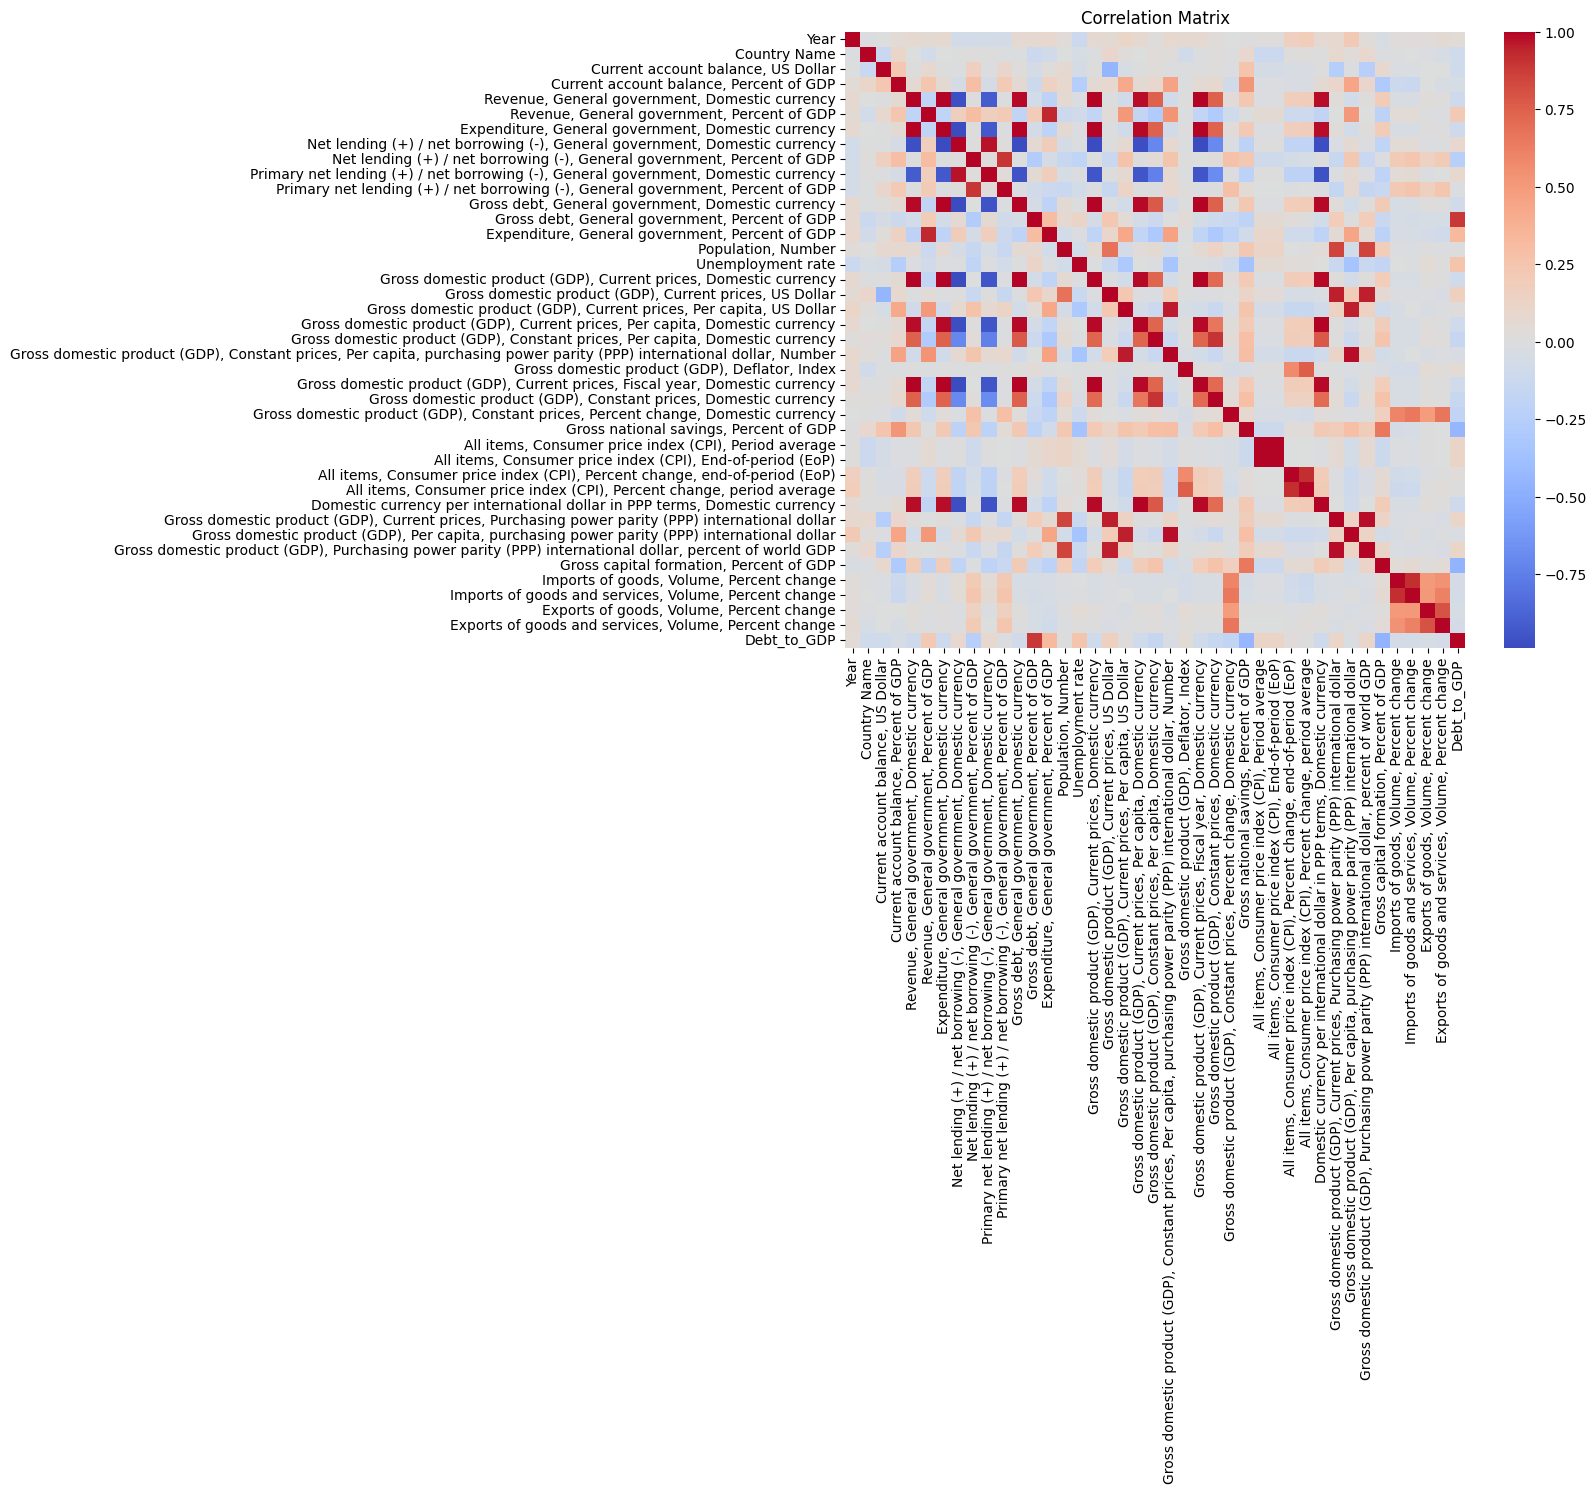

Features most correlated with Unemployment rate:
Unemployment rate                                                                                                        1.000000
Debt_to_GDP                                                                                                              0.247287
Gross debt, General government, Percent of GDP                                                                           0.116364
All items, Consumer price index (CPI), End-of-period (EoP)                                                               0.055920
All items, Consumer price index (CPI), Period average                                                                    0.055722
Exports of goods, Volume, Percent change                                                                                 0.051513
All items, Consumer price index (CPI), Percent change, end-of-period (EoP)                                               0.030426
All items, Consumer price index (CPI), Pe

In [118]:
# Correlation analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

# Show features most correlated with the target variable (Unemployment rate)
target = "Unemployment rate"
correlations = correlation_matrix[target].sort_values(ascending=False)
print("Features most correlated with Unemployment rate:")
print(correlations)

## Feature Scaling

In [120]:
# Scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Feature Importance

### Random Forest

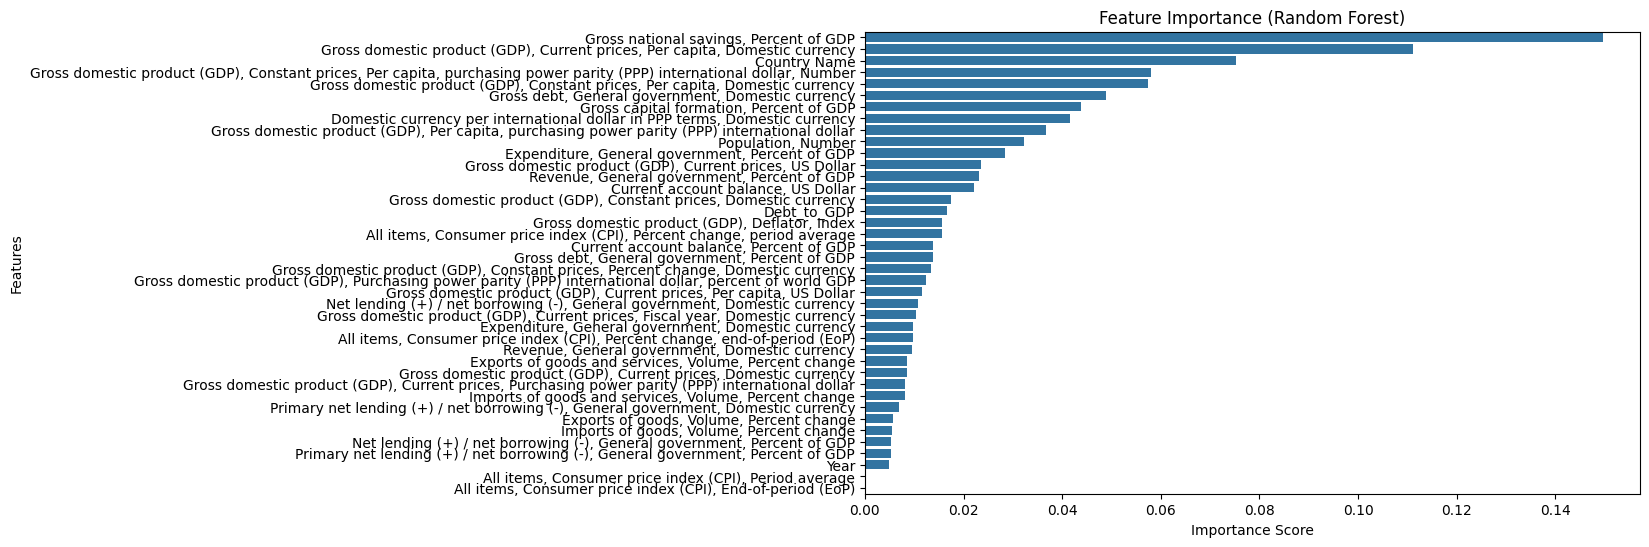

In [121]:
# Feature Importance for Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_importance = pd.Series(rf.feature_importances_, index=features.columns).sort_values(ascending=False)

# Plot Random Forest Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importance, y=rf_importance.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

### Gradient Boosting

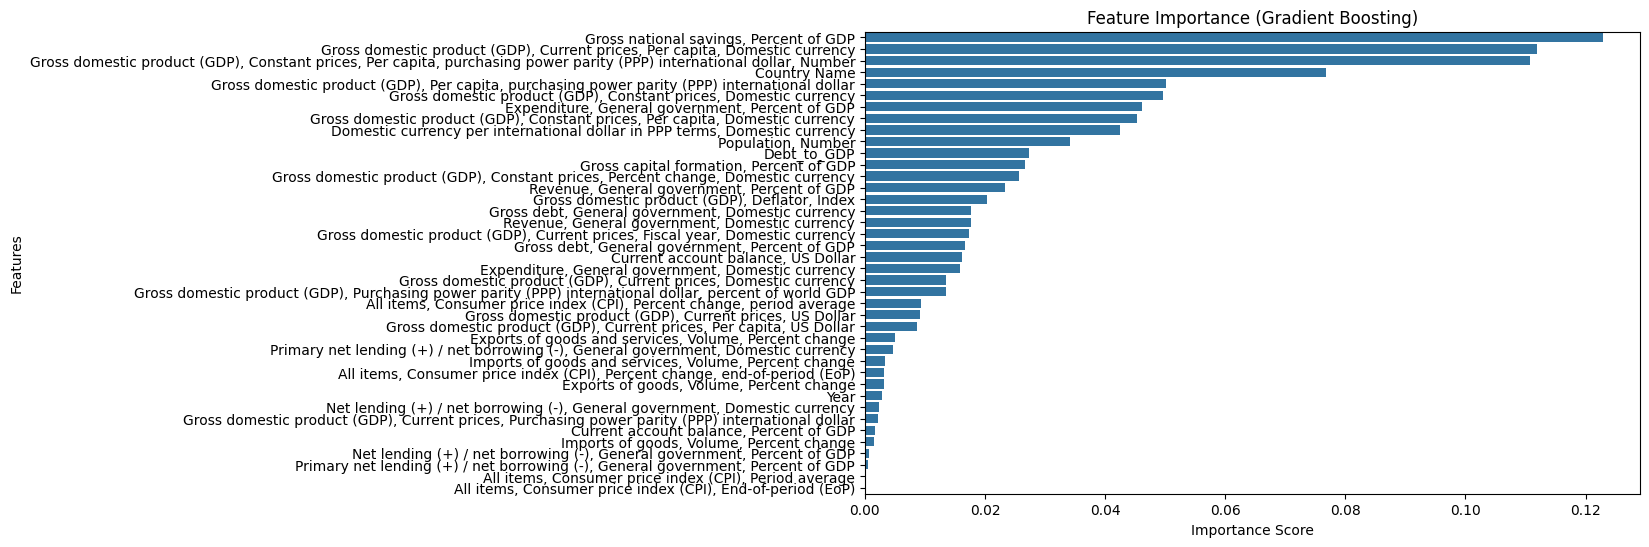

In [122]:
# Feature Importance for Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_scaled, y_train)
gb_importance = pd.Series(gb.feature_importances_, index=features.columns).sort_values(ascending=False)

# Plot Gradient Boosting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=gb_importance, y=gb_importance.index)
plt.title("Feature Importance (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

### XGBoost

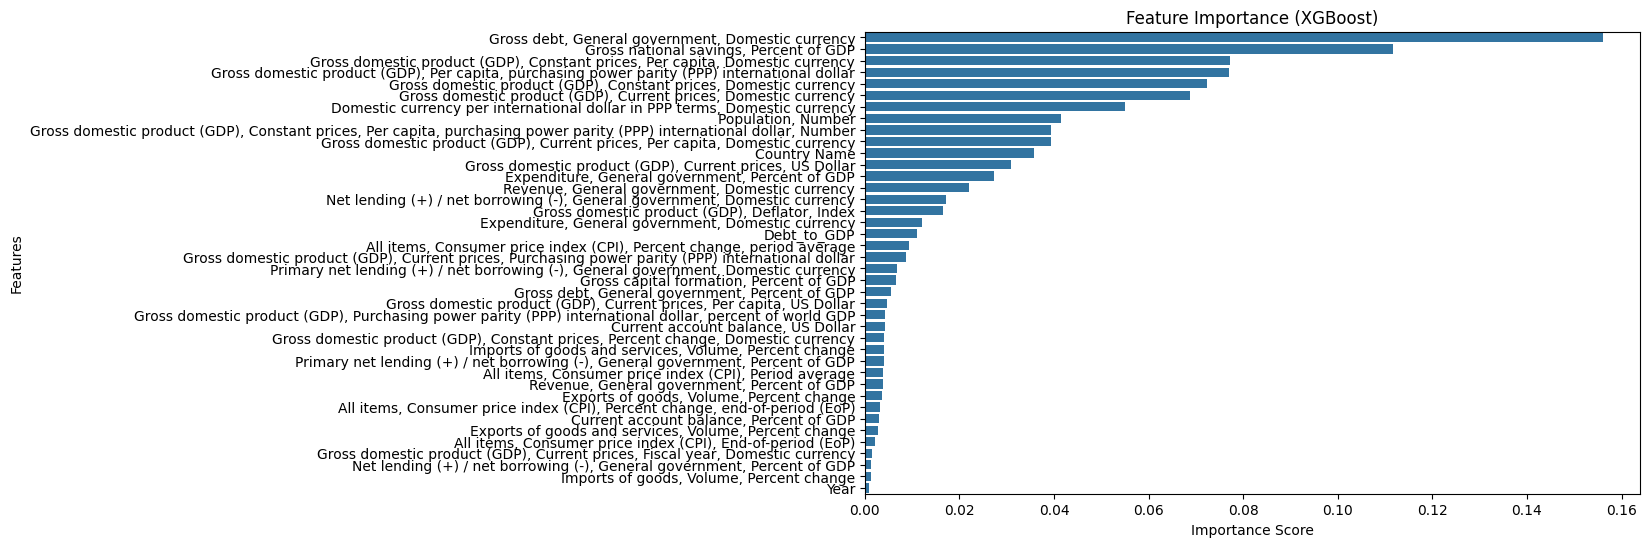

In [123]:
# Feature Importance for XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_importance = pd.Series(xgb_model.feature_importances_, index=features.columns).sort_values(ascending=False)

# Plot XGBoost Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importance, y=xgb_importance.index)
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

### CatBoost

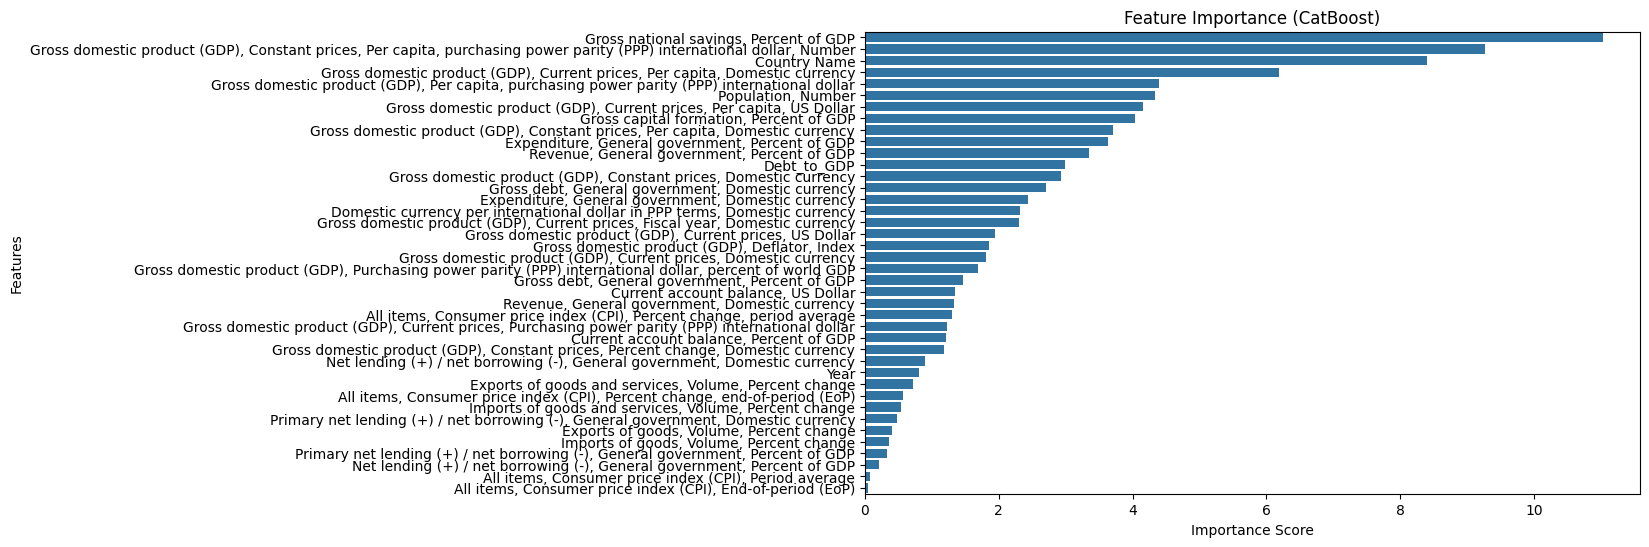

In [124]:
# Feature Importance for CatBoost
cat_model = CatBoostRegressor(random_state=42, verbose=0)
cat_model.fit(X_train_scaled, y_train)
cat_importance = pd.Series(cat_model.feature_importances_, index=features.columns).sort_values(ascending=False)

# Plot CatBoost Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=cat_importance, y=cat_importance.index)
plt.title("Feature Importance (CatBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Finding best treshold for features

In [125]:
# Define thresholds and evaluate models for each
thresholds = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

def evaluate_models(features_set, threshold):
    # Filter dataset to include only selected features
    X_train_filtered = X_train[features_set]
    X_test_filtered = X_test[features_set]
    
    # Train models with selected features
    models = {
        "Random Forest": RandomForestRegressor(random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42),
        "XGBoost": xgb.XGBRegressor(random_state=42),
        "CatBoost": CatBoostRegressor(random_state=42, verbose=0)
    }
    
    results = []
    for name, model in models.items():
        model.fit(X_train_filtered, y_train)
        r2 = model.score(X_test_filtered, y_test)
        results.append((name, threshold, r2))
    return results

# Store results for different thresholds
all_results = []

# Correct the loop for thresholds
for threshold in thresholds:
    # Identify important features based on the thresholds
    important_features = list(
        set(cat_importance[cat_importance > threshold * 10].index) |
        set(rf_importance[rf_importance > threshold].index) |
        set(gb_importance[gb_importance > threshold].index) |
        set(xgb_importance[xgb_importance > threshold].index)
    )
    
    if len(important_features) > 0:
        # Evaluate models with the selected features
        filtered_results = evaluate_models(important_features, threshold)
        all_results.extend(filtered_results)

# Convert results to DataFrame and display
results_df = pd.DataFrame(all_results, columns=["Model", "Threshold", "R² Score"])
print(results_df)

                Model  Threshold  R² Score
0       Random Forest       0.05  0.840154
1   Gradient Boosting       0.05  0.815127
2             XGBoost       0.05  0.818486
3            CatBoost       0.05  0.905337
4       Random Forest       0.10  0.858624
5   Gradient Boosting       0.10  0.822171
6             XGBoost       0.10  0.862022
7            CatBoost       0.10  0.901068
8       Random Forest       0.20  0.885759
9   Gradient Boosting       0.20  0.810698
10            XGBoost       0.20  0.877435
11           CatBoost       0.20  0.903354
12      Random Forest       0.30  0.883373
13  Gradient Boosting       0.30  0.798887
14            XGBoost       0.30  0.882942
15           CatBoost       0.30  0.916478
16      Random Forest       0.40  0.872552
17  Gradient Boosting       0.40  0.799242
18            XGBoost       0.40  0.885643
19           CatBoost       0.40  0.911831
20      Random Forest       0.50  0.881015
21  Gradient Boosting       0.50  0.759830
22         

# Model Evaulation

In [126]:
# # Load necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor, StackingRegressor
# import xgboost as xgb
# from catboost import CatBoostRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
# import lightgbm as lgb
# from sklearn.ensemble import AdaBoostRegressor

# # Load dataset
# df = pd.read_csv(r"project\unemployment_rate_dataset.csv")

# # Convert 'Country Name' to numerical encoding
# df['Country Name'] = df['Country Name'].astype('category').cat.codes

# # Fill missing values with median
# df.fillna(df.median(), inplace=True)

# # Feature Engineering
# df['Debt_to_GDP'] = df['Gross debt, General government, Percent of GDP'] / df['Gross capital formation, Percent of GDP']

# # Select features and target
# features = df.drop(columns=['Unemployment rate'])
# target = df['Unemployment rate']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# # Train models for feature importance
# cat_model = CatBoostRegressor(random_state=42, verbose=0)
# xgb_model = xgb.XGBRegressor(random_state=42)
# rf_model = RandomForestRegressor(random_state=42)
# gb_model = GradientBoostingRegressor(random_state=42)

# cat_model.fit(X_train, y_train)
# xgb_model.fit(X_train, y_train)
# rf_model.fit(X_train, y_train)
# gb_model.fit(X_train, y_train)

# # Extract feature importance
# cat_importance = pd.Series(cat_model.feature_importances_, index=features.columns)
# xgb_importance = pd.Series(xgb_model.feature_importances_, index=features.columns)
# rf_importance = pd.Series(rf_model.feature_importances_, index=features.columns)
# gb_importance = pd.Series(gb_model.feature_importances_, index=features.columns)

# # Visualize feature importance
# plt.figure(figsize=(14, 10))
# plt.subplot(2, 1, 1)
# xgb_importance.sort_values(ascending=False).plot(kind='barh')
# plt.title("Feature Importance (XGBoost)")
# plt.subplot(2, 1, 2)
# cat_importance.sort_values(ascending=False).plot(kind='barh')
# plt.title("Feature Importance (CatBoost)")
# plt.tight_layout()
# plt.show()

# # Define thresholds and evaluate models for each
# threshold = 0.2  # Set threshold to 20%

# def evaluate_models(features_set, threshold):
#     # Filter dataset to include only selected features
#     X_train_filtered = X_train[features_set]
#     X_test_filtered = X_test[features_set]
    
#     # Train models with selected features
#     models = {
#         "Random Forest": RandomForestRegressor(random_state=42),
#         "Gradient Boosting": GradientBoostingRegressor(random_state=42),
#         "XGBoost": xgb.XGBRegressor(random_state=42),
#         "CatBoost": CatBoostRegressor(random_state=42, verbose=0),
#         "Linear Regression": LinearRegression(),
#         "Lasso": Lasso(),
#         "Ridge": Ridge(),
#         "ElasticNet": ElasticNet(),
#         "KNN": KNeighborsRegressor(),
#         "Decision Tree": DecisionTreeRegressor(),
#         "SVR": SVR(),
#         "AdaBoost": AdaBoostRegressor()
#     }
    
#     results = []
#     for name, model in models.items():
#         model.fit(X_train_filtered, y_train)
#         y_pred = model.predict(X_test_filtered)
        
#         # Evaluate the model with multiple metrics
#         r2 = r2_score(y_test, y_pred)
#         mae = mean_absolute_error(y_test, y_pred)
#         mse = mean_squared_error(y_test, y_pred)
#         rmse = mean_squared_error(y_test, y_pred, squared=False)
#         evs = explained_variance_score(y_test, y_pred)
#         median_ae = median_absolute_error(y_test, y_pred)
        
#         results.append((name, threshold, r2, mae, mse, rmse, evs, median_ae))
#     return results

# # Store results for different thresholds
# all_results = []

# # Apply the threshold of 20% to feature importances
# important_features = list(
#     set(cat_importance[cat_importance > threshold * 10].index) |
#     set(rf_importance[rf_importance > threshold].index) |
#     set(gb_importance[gb_importance > threshold].index) |
#     set(xgb_importance[xgb_importance > threshold].index)
# )

# if len(important_features) > 0:
#     # Evaluate models with the selected features
#     filtered_results = evaluate_models(important_features, threshold)
#     all_results.extend(filtered_results)

# # Voting and Stacking Models
# voting_regressor = VotingRegressor(
#     estimators=[('Random Forest', RandomForestRegressor(random_state=42)),
#                 ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
#                 ('XGBoost', xgb.XGBRegressor(random_state=42))])
# voting_regressor.fit(X_train, y_train)
# voting_preds = voting_regressor.predict(X_test)

# stacking_regressor = StackingRegressor(
#     estimators=[('Random Forest', RandomForestRegressor(random_state=42)),
#                 ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
#                 ('XGBoost', xgb.XGBRegressor(random_state=42))],
#     final_estimator=LinearRegression())
# stacking_regressor.fit(X_train, y_train)
# stacking_preds = stacking_regressor.predict(X_test)

# # Evaluate Voting and Stacking models
# voting_r2 = r2_score(y_test, voting_preds)
# stacking_r2 = r2_score(y_test, stacking_preds)

# results_df = pd.DataFrame(all_results, columns=["Model", "Threshold", "R²", "MAE", "MSE", "RMSE", "Explained Variance", "Median Absolute Error"])

# # Add voting and stacking results using pd.concat
# voting_results = pd.DataFrame([{
#     "Model": "Voting Regressor", "Threshold": threshold,
#     "R²": voting_r2, "MAE": mean_absolute_error(y_test, voting_preds),
#     "MSE": mean_squared_error(y_test, voting_preds),
#     "RMSE": mean_squared_error(y_test, voting_preds, squared=False),
#     "Explained Variance": explained_variance_score(y_test, voting_preds),
#     "Median Absolute Error": median_absolute_error(y_test, voting_preds)
# }])

# stacking_results = pd.DataFrame([{
#     "Model": "Stacking Regressor", "Threshold": threshold,
#     "R²": stacking_r2, "MAE": mean_absolute_error(y_test, stacking_preds),
#     "MSE": mean_squared_error(y_test, stacking_preds),
#     "RMSE": mean_squared_error(y_test, stacking_preds, squared=False),
#     "Explained Variance": explained_variance_score(y_test, stacking_preds),
#     "Median Absolute Error": median_absolute_error(y_test, stacking_preds)
# }])

# # Concatenate the results with the existing DataFrame
# results_df = pd.concat([results_df, voting_results, stacking_results], ignore_index=True)

# # Display the results
# print(results_df)


In [148]:
from sklearn.metrics import mean_squared_error

In [138]:
# Load necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor, VotingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor, ElasticNet, BayesianRidge, PassiveAggressiveRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"E:\Master's Courses\CSE533 Azk Spring 2025\project\unemployment_rate_dataset_cleaned.csv")

# Convert 'Country Name' to numerical encoding
df['Country Name'] = df['Country Name'].astype('category').cat.codes

# Fill missing values with median
df.fillna(df.median(), inplace=True)

# Feature Engineering
df['Debt_to_GDP'] = df['Gross debt, General government, Percent of GDP'] / df['Gross capital formation, Percent of GDP']

# Select features and target
features = df.drop(columns=['Unemployment rate'])
target = df['Unemployment rate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate models
def evaluate_models(X_train, X_test, y_train, y_test):
    # List of models to evaluate
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Random Forest": RandomForestRegressor(random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42),
        "Support Vector Machine": SVR(),
        "k-Nearest Neighbors": KNeighborsRegressor(),
        "Neural Network": MLPRegressor(random_state=42, max_iter=500),
        "XGBoost": xgb.XGBRegressor(random_state=42),
        "CatBoost": CatBoostRegressor(random_state=42, verbose=0),
        "AdaBoost": AdaBoostRegressor(random_state=42),
        "Extra Trees": ExtraTreesRegressor(random_state=42),
        "Huber Regressor": HuberRegressor(),
        "ElasticNet": ElasticNet(random_state=42),
        "Bayesian Ridge": BayesianRidge(),
        "Passive Aggressive": PassiveAggressiveRegressor(random_state=42),
        "Kernel Ridge": KernelRidge(),
    }
    
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Evaluate model with metrics
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** 0.5
        evs = explained_variance_score(y_test, y_pred)
        median_ae = median_absolute_error(y_test, y_pred)
        
        results.append((name, r2, mae, mse, rmse, evs, median_ae))
    return results

# Evaluate models with scaled data
model_results = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test)

# Ensemble Models: Voting and Stacking
voting_model = VotingRegressor(estimators=[
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("CatBoost", CatBoostRegressor(random_state=42, verbose=0)),
    ("XGBoost", xgb.XGBRegressor(random_state=42))
])

stacking_model = StackingRegressor(
    estimators=[
        ("Random Forest", RandomForestRegressor(random_state=42)),
        ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
        ("CatBoost", CatBoostRegressor(random_state=42, verbose=0)),
        ("XGBoost", xgb.XGBRegressor(random_state=42))
    ],
    final_estimator=ElasticNet(random_state=42)
)

# Train and evaluate ensemble models
ensemble_models = {
    "Voting Regressor": voting_model,
    "Stacking Regressor": stacking_model
}

for name, model in ensemble_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Metrics calculation
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    evs = explained_variance_score(y_test, y_pred)
    median_ae = median_absolute_error(y_test, y_pred)
    
    model_results.append((name, r2, mae, mse, rmse, evs, median_ae))

# Convert results to DataFrame and display
results_df = pd.DataFrame(model_results, columns=["Model", "R²", "MAE", "MSE", "RMSE", "Explained Variance", "Median Absolute Error"])
print(results_df)


C:\Users\88018\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\88018\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                     Model        R²       MAE        MSE      RMSE  \
0        Linear Regression  0.219240  3.260602  23.124584  4.808803   
1         Ridge Regression  0.215169  3.274105  23.245152  4.821323   
2         Lasso Regression  0.116301  3.456094  26.173431  5.115998   
3            Decision Tree  0.758075  1.640963   7.165333  2.676814   
4            Random Forest  0.835850  1.457152   4.861807  2.204951   
5        Gradient Boosting  0.803791  1.699238   5.811331  2.410670   
6   Support Vector Machine  0.201476  2.845611  23.650702  4.863199   
7      k-Nearest Neighbors  0.555543  2.332888  13.163953  3.628216   
8           Neural Network  0.495257  2.591681  14.949501  3.866458   
9                  XGBoost  0.854382  1.419037   4.312929  2.076759   
10                CatBoost  0.901434  1.130164   2.919340  1.708608   
11                AdaBoost  0.600612  2.751403  11.829079  3.439343   
12             Extra Trees  0.910747  1.128937   2.643509  1.625887   
13    

In [188]:
# Load necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor, VotingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor, ElasticNet, BayesianRidge, PassiveAggressiveRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"E:\Master's Courses\CSE533 Azk Spring 2025\project\unemployment_rate_dataset_cleaned.csv")

# Convert 'Country Name' to numerical encoding
df['Country Name'] = df['Country Name'].astype('category').cat.codes

# Fill missing values with median
df.fillna(df.median(), inplace=True)

# Feature Engineering
df['Debt_to_GDP'] = df['Gross debt, General government, Percent of GDP'] / df['Gross capital formation, Percent of GDP']

# Select features and target
features = df.drop(columns=['Unemployment rate'])
target = df['Unemployment rate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate models
def evaluate_models(X_train, X_test, y_train, y_test):
    # List of models to evaluate
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Random Forest": RandomForestRegressor(random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42),
        "Support Vector Machine": SVR(),
        "k-Nearest Neighbors": KNeighborsRegressor(),
        "Neural Network": MLPRegressor(random_state=42, max_iter=500),
        "XGBoost": xgb.XGBRegressor(random_state=42),
        "CatBoost": CatBoostRegressor(random_state=42, verbose=0),
        "AdaBoost": AdaBoostRegressor(random_state=42),
        "Extra Trees": ExtraTreesRegressor(random_state=42),
        "Huber Regressor": HuberRegressor(),
        "ElasticNet": ElasticNet(random_state=42),
        "Bayesian Ridge": BayesianRidge(),
        "Passive Aggressive": PassiveAggressiveRegressor(random_state=42),
        "Kernel Ridge": KernelRidge(),
    }
    
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Evaluate model with metrics
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** 0.5
        evs = explained_variance_score(y_test, y_pred)
        median_ae = median_absolute_error(y_test, y_pred)
        
        results.append((name, r2, mae, mse, rmse, evs, median_ae))
    return results

# Evaluate models with scaled data
model_results = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test)

# Ensemble Models: Voting and Stacking
voting_model = VotingRegressor(estimators=[
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("CatBoost", CatBoostRegressor(random_state=42, verbose=0)),
    ("XGBoost", xgb.XGBRegressor(random_state=42))
])

stacking_model = StackingRegressor(
    estimators=[
        ("Random Forest", RandomForestRegressor(random_state=42)),
        ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
        ("CatBoost", CatBoostRegressor(random_state=42, verbose=0)),
        ("XGBoost", xgb.XGBRegressor(random_state=42))
    ],
    final_estimator=ExtraTreesRegressor(random_state=42)
)

# Train and evaluate ensemble models
ensemble_models = {
    "Voting Regressor": voting_model,
    "Stacking Regressor": stacking_model
}

for name, model in ensemble_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Metrics calculation
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    evs = explained_variance_score(y_test, y_pred)
    median_ae = median_absolute_error(y_test, y_pred)
    
    model_results.append((name, r2, mae, mse, rmse, evs, median_ae))

# Convert results to DataFrame and display
results_df = pd.DataFrame(model_results, columns=["Model", "R²", "MAE", "MSE", "RMSE", "Explained Variance", "Median Absolute Error"])
print(results_df)


C:\Users\88018\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\88018\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                     Model        R²       MAE        MSE      RMSE  \
0        Linear Regression  0.219240  3.260602  23.124584  4.808803   
1         Ridge Regression  0.215169  3.274105  23.245152  4.821323   
2         Lasso Regression  0.116301  3.456094  26.173431  5.115998   
3            Decision Tree  0.758075  1.640963   7.165333  2.676814   
4            Random Forest  0.835850  1.457152   4.861807  2.204951   
5        Gradient Boosting  0.803791  1.699238   5.811331  2.410670   
6   Support Vector Machine  0.201476  2.845611  23.650702  4.863199   
7      k-Nearest Neighbors  0.555543  2.332888  13.163953  3.628216   
8           Neural Network  0.495257  2.591681  14.949501  3.866458   
9                  XGBoost  0.854382  1.419037   4.312929  2.076759   
10                CatBoost  0.901434  1.130164   2.919340  1.708608   
11                AdaBoost  0.600612  2.751403  11.829079  3.439343   
12             Extra Trees  0.910747  1.128937   2.643509  1.625887   
13    

## Rank best performing models

In [139]:
# Filter top 10 models based on R² (or adjust the sorting criteria if needed)
top_10_models = results_df.sort_values(by="R²", ascending=False).head(10)

# Display the top 10 models
print("Top 10 Models:")
print(top_10_models)

# Save to a CSV 
top_10_models.to_csv(r"E:\Master's Courses\CSE533 Azk Spring 2025\project\top_10_models.csv", index=False)


Top 10 Models:
                  Model        R²       MAE        MSE      RMSE  \
12          Extra Trees  0.910747  1.128937   2.643509  1.625887   
10             CatBoost  0.901434  1.130164   2.919340  1.708608   
19   Stacking Regressor  0.900214  1.144500   2.955462  1.719146   
18     Voting Regressor  0.873869  1.350140   3.735758  1.932811   
9               XGBoost  0.854382  1.419037   4.312929  2.076759   
4         Random Forest  0.835850  1.457152   4.861807  2.204951   
5     Gradient Boosting  0.803791  1.699238   5.811331  2.410670   
3         Decision Tree  0.758075  1.640963   7.165333  2.676814   
11             AdaBoost  0.600612  2.751403  11.829079  3.439343   
7   k-Nearest Neighbors  0.555543  2.332888  13.163953  3.628216   

    Explained Variance  Median Absolute Error  
12            0.910799               0.722090  
10            0.901434               0.704509  
19            0.900639               0.742114  
18            0.873949               0.89218

C:\Users\88018\AppData\Local\Temp\ipykernel_5828\641156017.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_models, y="Model", x="R²", palette="Blues_d")


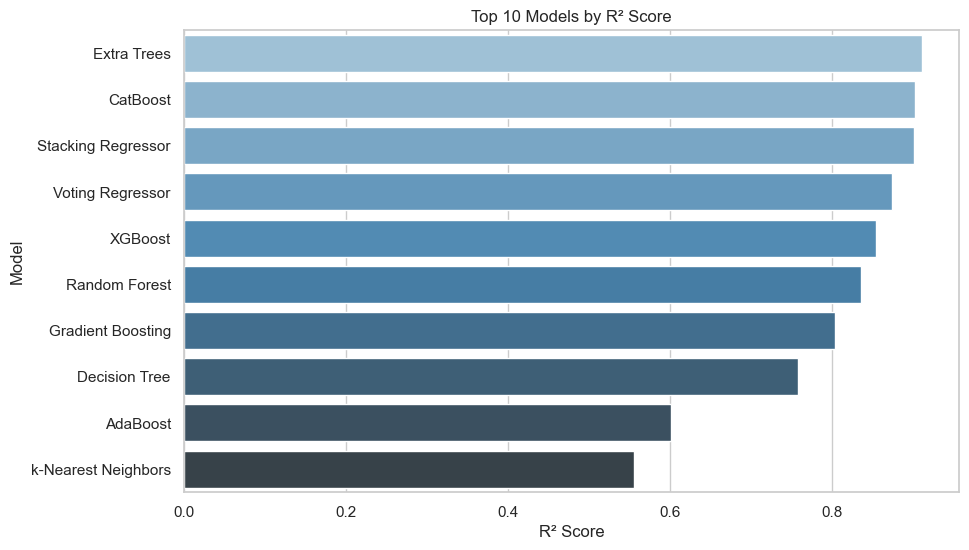

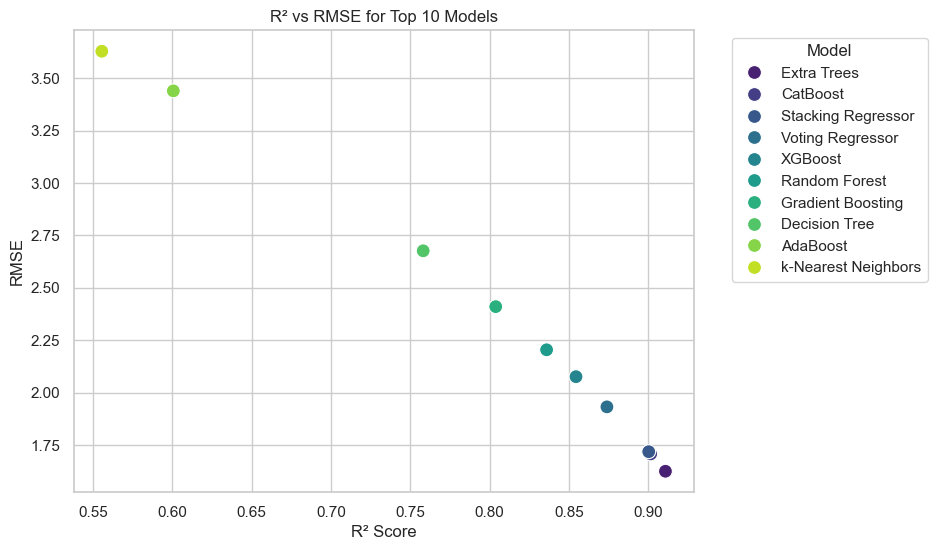

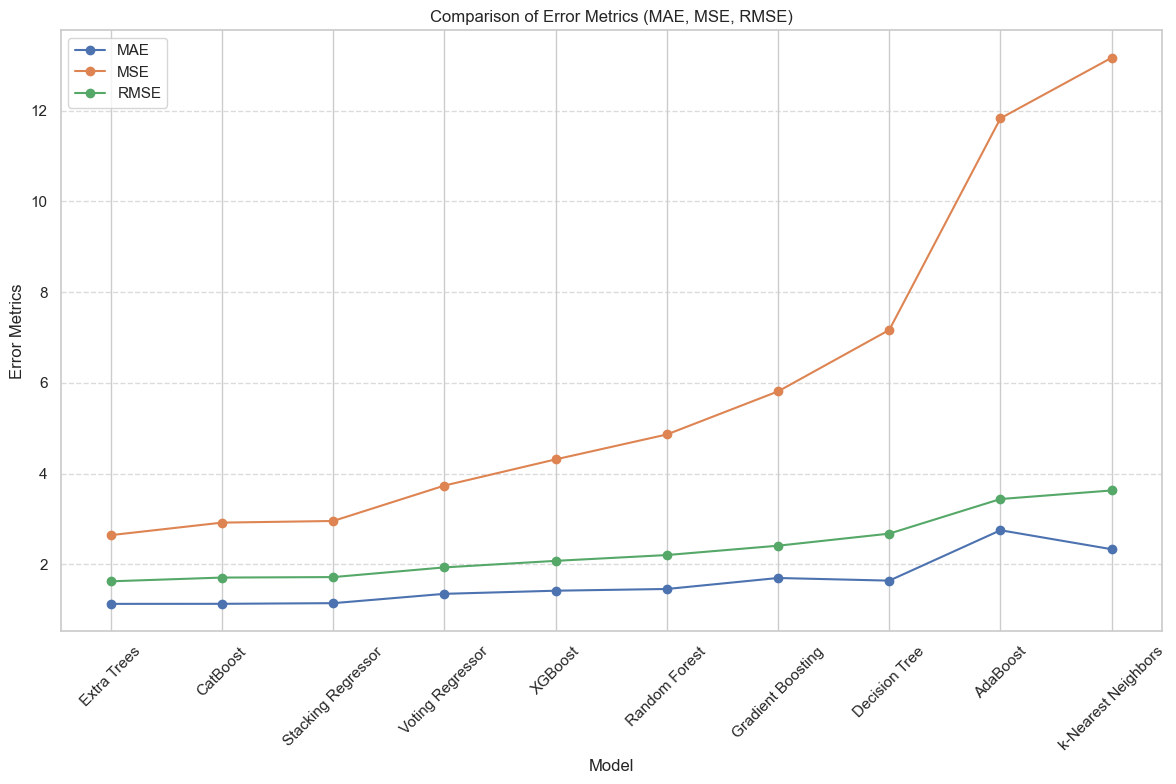

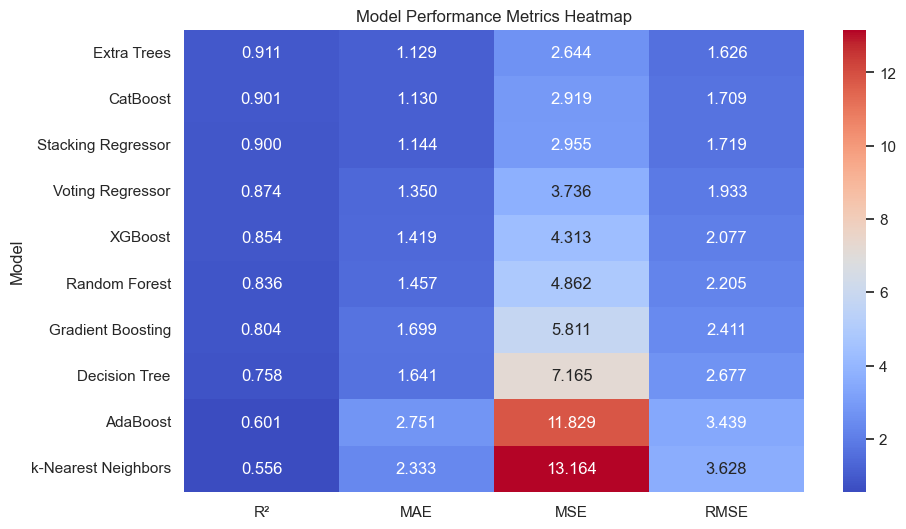

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the new dataset
data = r"E:\Master's Courses\CSE533 Azk Spring 2025\project\top_10_models.csv"

# Create a DataFrame
results_df =pd.read_csv(data)

# Sort models by R² for visualization
top_10_models = results_df.sort_values(by="R²", ascending=False)

# Set the style for plots
sns.set_theme(style="whitegrid")

# Bar Chart for R²
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_models, y="Model", x="R²", palette="Blues_d")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.title("Top 10 Models by R² Score")
plt.show()

# Scatter Plot: R² vs RMSE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=top_10_models, x="R²", y="RMSE", hue="Model", palette="viridis", s=100)
plt.xlabel("R² Score")
plt.ylabel("RMSE")
plt.title("R² vs RMSE for Top 10 Models")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Model")
plt.show()

# Line Plot for MAE, MSE, and RMSE
plt.figure(figsize=(12, 8))
for metric in ["MAE", "MSE", "RMSE"]:
    plt.plot(top_10_models["Model"], top_10_models[metric], marker="o", label=metric)
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.ylabel("Error Metrics")
plt.title("Comparison of Error Metrics (MAE, MSE, RMSE)")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Heatmap for Model Performance
metrics = ["R²", "MAE", "MSE", "RMSE"]
plt.figure(figsize=(10, 6))
sns.heatmap(
    top_10_models[metrics].set_index(top_10_models["Model"]), 
    annot=True, fmt=".3f", cmap="coolwarm", cbar=True
)
plt.title("Model Performance Metrics Heatmap")
plt.show()

## Extra Trees

 Extra Trees:
 MAE=0.8277, RMSE=1.4473, R²=0.9201

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}

Optimized Extra Trees:
 MAE=1.1810, RMSE=1.7910, R²=0.8776

Cross-Validation R² Scores: [0.87331081 0.89938069 0.84126834 0.91461969 0.82780591]
Mean Cross-Validation R²: 0.8713



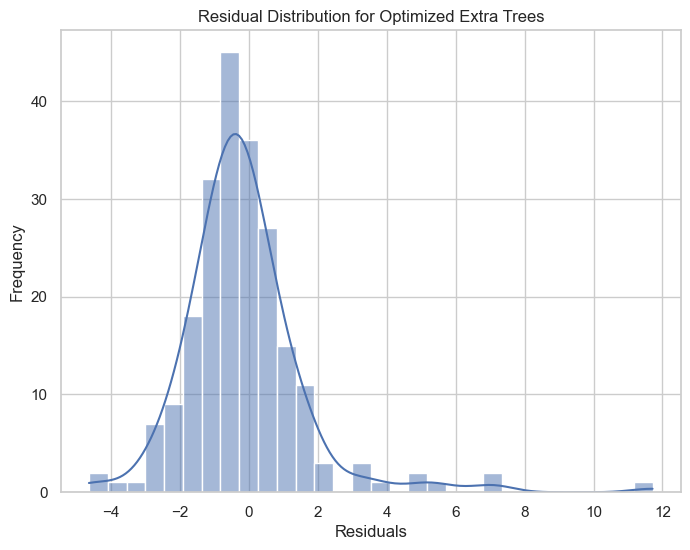

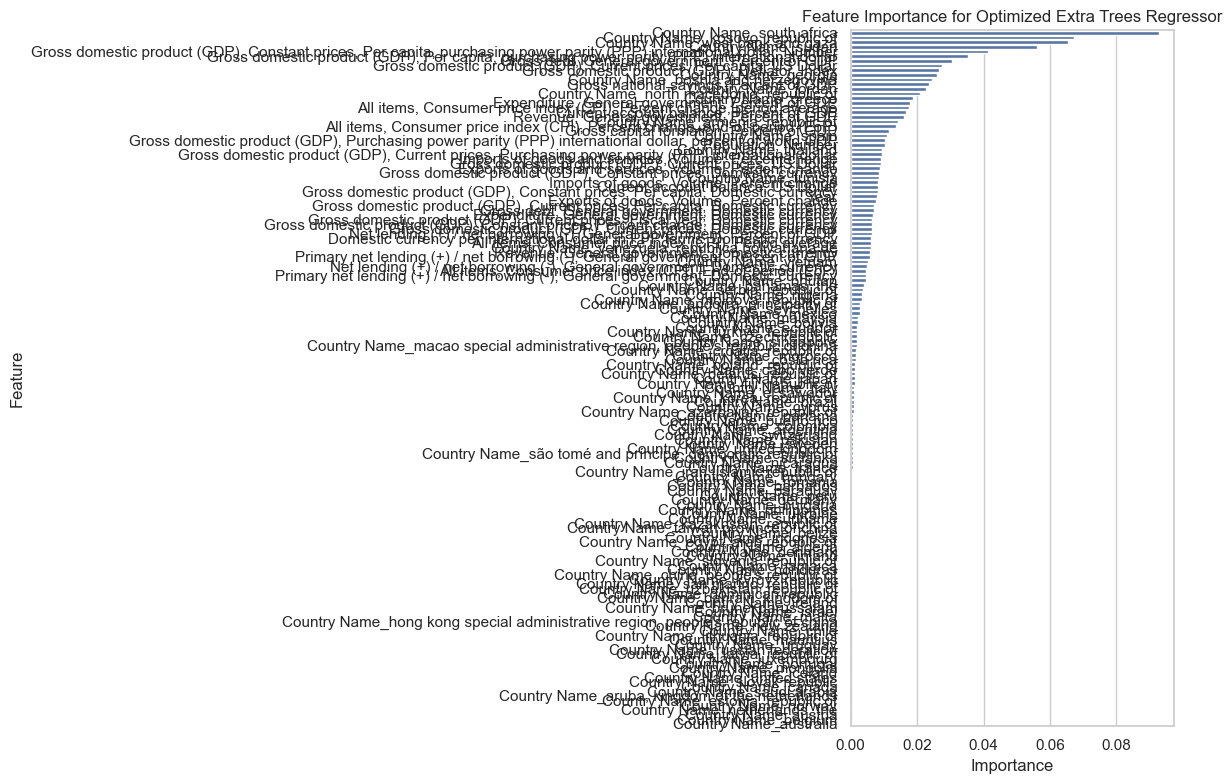

Correlation with 'Unemployment rate':

Unemployment rate                                                                                                        1.000000
Country Name_south africa                                                                                                0.354430
Country Name_sudan                                                                                                       0.347244
Country Name_west bank and gaza                                                                                          0.257292
Country Name_kosovo, republic of                                                                                         0.245235
                                                                                                                           ...   
Current account balance, Percent of GDP                                                                                 -0.314622
Gross domestic product (GDP), Current prices, Per c

In [170]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"E:\Master's Courses\CSE533 Azk Spring 2025\project\unemployment_rate_dataset_cleaned.csv")  # use forward slashes for cross-platform compatibility

# One-hot encode the 'Country Name' column
df = pd.get_dummies(df, columns=['Country Name'], drop_first=True)

# Fill missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)  # numeric_only to avoid warnings with newer pandas versions

# (Optional) Feature Engineering — Uncomment if needed
# df['Debt_to_GDP'] = df['Gross debt, General government, Percent of GDP'] / df['Gross capital formation, Percent of GDP']
# df['Inflation_Rate_Difference'] = df['All items, Consumer price index (CPI), Percent change, end-of-period (EoP)'] - \
#                                   df['All items, Consumer price index (CPI), Percent change, period average']

# Ensure target variable exists
if 'Unemployment rate' not in df.columns:
    raise ValueError("'Unemployment rate' column is missing from dataset!")

# Select features and target
features = df.drop(columns=['Unemployment rate'])
target = df['Unemployment rate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Extra Trees Regressor - Initial Model
et_model = ExtraTreesRegressor(random_state=42)
et_model.fit(X_train_scaled, y_train)

# Evaluate Initial Model
y_pred_initial = et_model.predict(X_test_scaled)
mae_initial = mean_absolute_error(y_test, y_pred_initial)
rmse_initial = np.sqrt(mean_squared_error(y_test, y_pred_initial))  
r2_initial = r2_score(y_test, y_pred_initial)


print(f" Extra Trees:\n MAE={mae_initial:.4f}, RMSE={rmse_initial:.4f}, R²={r2_initial:.4f}\n")

# Hyperparameter Tuning
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'] 
}

et_random_search = RandomizedSearchCV(
    ExtraTreesRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    scoring='r2',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

et_random_search.fit(X_train_scaled, y_train)

# Best Extra Trees Model
best_et = et_random_search.best_estimator_
print(f"Best Parameters: {et_random_search.best_params_}\n")

# Evaluate Best Model
y_pred_best = best_et.predict(X_test_scaled)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))  
r2_best = r2_score(y_test, y_pred_best)


print(f"Optimized Extra Trees:\n MAE={mae_best:.4f}, RMSE={rmse_best:.4f}, R²={r2_best:.4f}\n")

# Cross-Validation for Robustness
cv_scores = cross_val_score(best_et, X_train_scaled, y_train, cv=5, scoring='r2', n_jobs=-1)
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R²: {np.mean(cv_scores):.4f}\n")

# Residual Analysis
residuals = y_test - y_pred_best
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residual Distribution for Optimized Extra Trees")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Feature Importance
importances = best_et.feature_importances_
features_df = pd.DataFrame({'Feature': features.columns, 'Importance': importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title("Feature Importance for Optimized Extra Trees Regressor")
plt.tight_layout()
plt.show()

# Correlations with Target
correlation_matrix = df.corr(numeric_only=True)  # ensure no warning in new pandas versions
print("Correlation with 'Unemployment rate':\n")
print(correlation_matrix['Unemployment rate'].sort_values(ascending=False))


## Unemployment Rate Cleaned

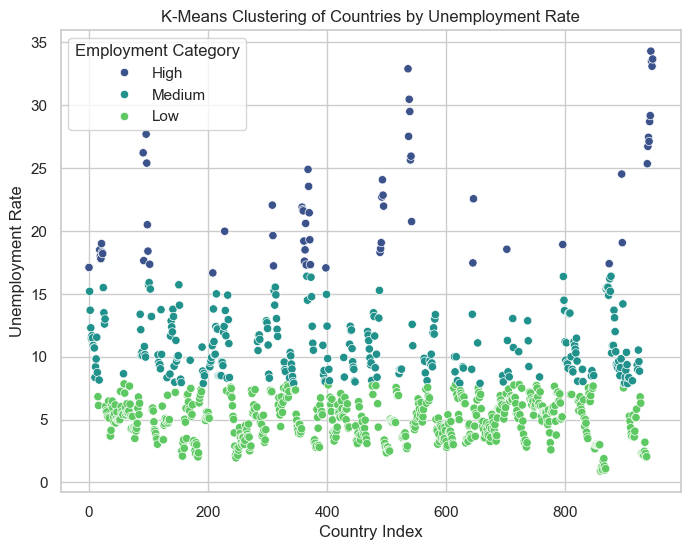

Initial Extra Trees Model:
 MAE = 1.1248
 RMSE = 1.6035
 R² = 0.9132
 Explained Variance = 0.9132
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'absolute_error', 'bootstrap': False}
Optimized Extra Trees Model:
 MAE = 1.2787
 RMSE = 1.8918
 R² = 0.8792
 Explained Variance = 0.8792
Cross-Validation R² Scores: [0.7155133  0.83182886 0.79186872 0.82602236 0.72659832]
Mean Cross-Validation R²: 0.7784


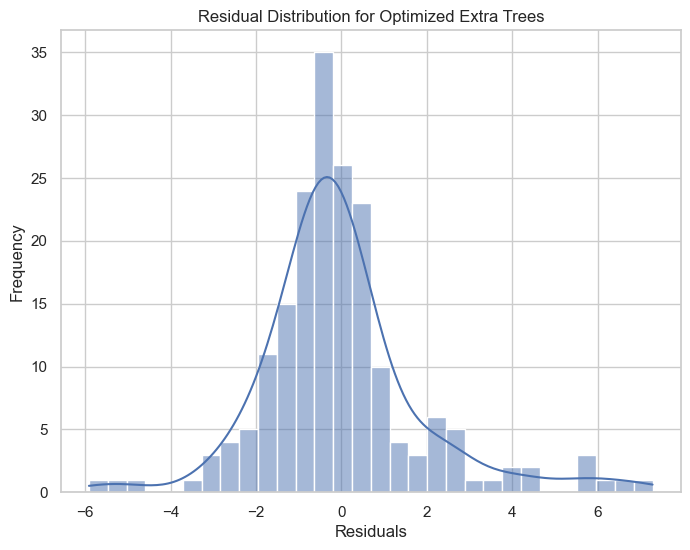

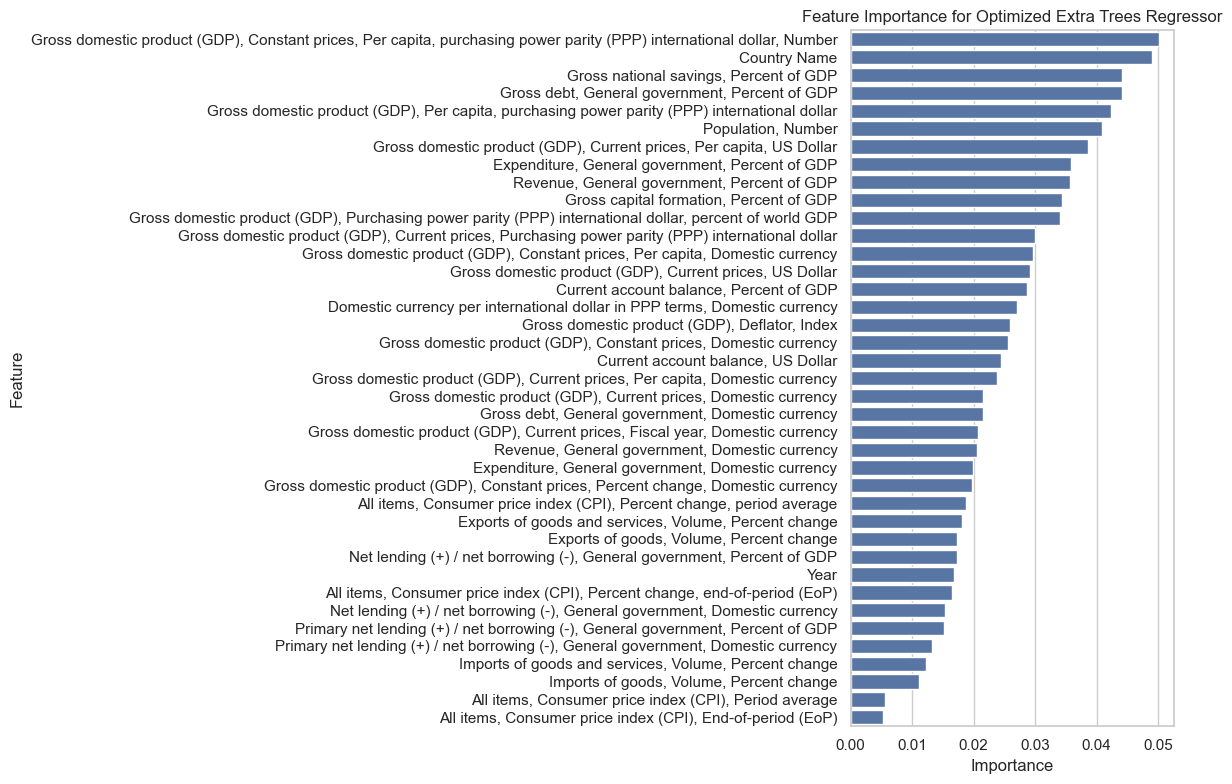


Analyzing category: Low
Identified Estimand:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                       ↪
────────────────(E[Unemployment_Rate|Savings_R ↪
d[Govt_Spending]                               ↪

↪                                
↪ ate,Population,GDP_Per_Capita])
↪                                
Estimand assumption 1, Unconfoundedness: If U→{Govt_Spending} and U→Unemployment_Rate then P(Unemployment_Rate|Govt_Spending,Savings_Rate,Population,GDP_Per_Capita,U) = P(Unemployment_Rate|Govt_Spending,Savings_Rate,Population,GDP_Per_Capita)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Causal Effect Estimate for Low: 0.012022787640495913

Analyzing category: Medium
Identified Estimand:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       

C:\Users\88018\AppData\Local\Programs\Python\Python310\lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
C:\Users\88018\AppData\Local\Programs\Python\Python310\lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
C:\Users\88018\AppData\Local\Programs\Python\Python310\lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is depr

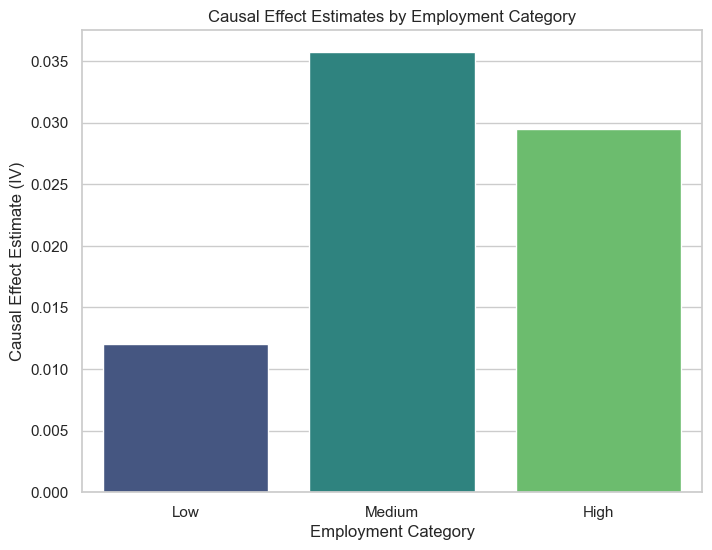

In [196]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import dowhy
from dowhy import CausalModel

# Load dataset
df = pd.read_csv(r"E:\Master's Courses\CSE533 Azk Spring 2025\project\unemployment_rate_dataset_cleaned.csv")

# One-hot encode the 'Country Name' column
df['Country Name'] = df['Country Name'].astype('category').cat.codes

# Fill missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Ensure target variable exists
if 'Unemployment rate' not in df.columns:
    raise ValueError("'Unemployment rate' column is missing from dataset!")

# Feature Engineering (Optional)
# df['Debt_to_GDP'] = df['Gross debt, General government, Percent of GDP'] / df['Gross capital formation, Percent of GDP']

# Select features and target
features = df.drop(columns=['Unemployment rate'])
target = df['Unemployment rate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Means Clustering based on Unemployment Rate
kmeans = KMeans(n_clusters=3, random_state=42)
df['Employment Category'] = kmeans.fit_predict(df[['Unemployment rate']])
cluster_centers = kmeans.cluster_centers_

# Rename clusters for better interpretation
df['Employment Category'] = df['Employment Category'].map({0: 'Low', 1: 'Medium', 2: 'High'})

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.index, y='Unemployment rate', hue='Employment Category', data=df, palette="viridis")
plt.title("K-Means Clustering of Countries by Unemployment Rate")
plt.xlabel("Country Index")
plt.ylabel("Unemployment Rate")
plt.show()

# Extra Trees Regressor - Initial Model
et_model = ExtraTreesRegressor(random_state=42)
et_model.fit(X_train_scaled, y_train)

# Evaluate Initial Model
y_pred_initial = et_model.predict(X_test_scaled)
mae_initial = mean_absolute_error(y_test, y_pred_initial)
rmse_initial = np.sqrt(mean_squared_error(y_test, y_pred_initial))
r2_initial = r2_score(y_test, y_pred_initial)
explained_variance_initial = explained_variance_score(y_test, y_pred_initial)

print(f"Initial Extra Trees Model:")
print(f" MAE = {mae_initial:.4f}")
print(f" RMSE = {rmse_initial:.4f}")
print(f" R² = {r2_initial:.4f}")
print(f" Explained Variance = {explained_variance_initial:.4f}")

# Hyperparameter Tuning
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500, 700, 1000],
    'max_depth': [None, 5, 10, 15, 20, 30, 40, 50, 60],
    'min_samples_split': [2, 3, 5, 7, 10, 15, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 8],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['squared_error', 'absolute_error']
}

et_random_search = RandomizedSearchCV(
    ExtraTreesRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=100,
    scoring='r2',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

et_random_search.fit(X_train_scaled, y_train)

# Best Extra Trees Model
best_et = et_random_search.best_estimator_
print(f"Best Parameters: {et_random_search.best_params_}")

# Evaluate Best Model
y_pred_best = best_et.predict(X_test_scaled)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)
explained_variance_best = explained_variance_score(y_test, y_pred_best)

print(f"Optimized Extra Trees Model:")
print(f" MAE = {mae_best:.4f}")
print(f" RMSE = {rmse_best:.4f}")
print(f" R² = {r2_best:.4f}")
print(f" Explained Variance = {explained_variance_best:.4f}")

# Cross-Validation for Robustness
cv_scores = cross_val_score(best_et, X_train_scaled, y_train, cv=5, scoring='r2', n_jobs=-1)
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R²: {np.mean(cv_scores):.4f}")

# Residual Analysis
residuals = y_test - y_pred_best
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residual Distribution for Optimized Extra Trees")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Feature Importance
importances = best_et.feature_importances_
features_df = pd.DataFrame({'Feature': features.columns, 'Importance': importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title("Feature Importance for Optimized Extra Trees Regressor")
plt.tight_layout()
plt.show()

# Causal Analysis
causal_effects = {}
for category in ['Low', 'Medium', 'High']:
    print(f"\nAnalyzing category: {category}")
    
    # Filter data for the current cluster
    cluster_data = df[df['Employment Category'] == category]
    
    # Ensure required columns exist and no missing values
    required_columns = [
        'Unemployment rate',  # Outcome
        'Expenditure, General government, Percent of GDP',  # Treatment
        'Gross national savings, Percent of GDP',  # Control
        'Population, Number',  # Control
        'Gross domestic product (GDP), Current prices, Per capita, US Dollar',  # Control
    ]
    cluster_data = cluster_data.dropna(subset=required_columns)
    
    # Rename columns for simplicity
    cluster_data = cluster_data.rename(columns={
        'Unemployment rate': 'Unemployment_Rate',
        'Expenditure, General government, Percent of GDP': 'Govt_Spending',
        'Gross national savings, Percent of GDP': 'Savings_Rate',
        'Population, Number': 'Population',
        'Gross domestic product (GDP), Current prices, Per capita, US Dollar': 'GDP_Per_Capita'
    })
    
    # Create DoWhy causal model
    model = dowhy.CausalModel(
        data=cluster_data,
        treatment='Govt_Spending',
        outcome='Unemployment_Rate',
        common_causes=['Savings_Rate', 'Population', 'GDP_Per_Capita']
    )
    
    # Identify the causal effect
    identified_estimand = model.identify_effect()
    print("Identified Estimand:")
    print(identified_estimand)
    
    # Estimate the causal effect using IV method
    causal_estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
    print(f"Causal Effect Estimate for {category}: {causal_estimate.value}")
    
    # Store the causal effect for this category
    causal_effects[category] = causal_estimate.value

# Visualize the causal effects across categories
categories = list(causal_effects.keys())
effects = list(causal_effects.values())

plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=effects, palette="viridis")
plt.title('Causal Effect Estimates by Employment Category')
plt.xlabel('Employment Category')
plt.ylabel('Causal Effect Estimate (IV)')
plt.show()

 Extra Trees Model:
 MAE = 0.8631
 RMSE = 1.4047
 R² = 0.9334
 Explained Variance = 0.9341
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'squared_error', 'bootstrap': False}

Optimized Extra Trees Model:
 MAE = 1.1912
 RMSE = 1.7183
 R² = 0.9003
 Explained Variance = 0.9003
Cross-Validation R² Scores: [0.74097203 0.88886963 0.86077582 0.8590768  0.76286961]
Mean Cross-Validation R²: 0.8225



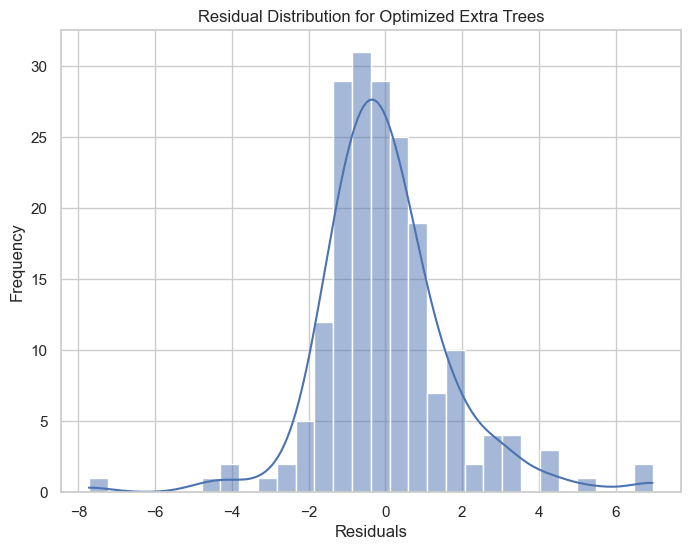

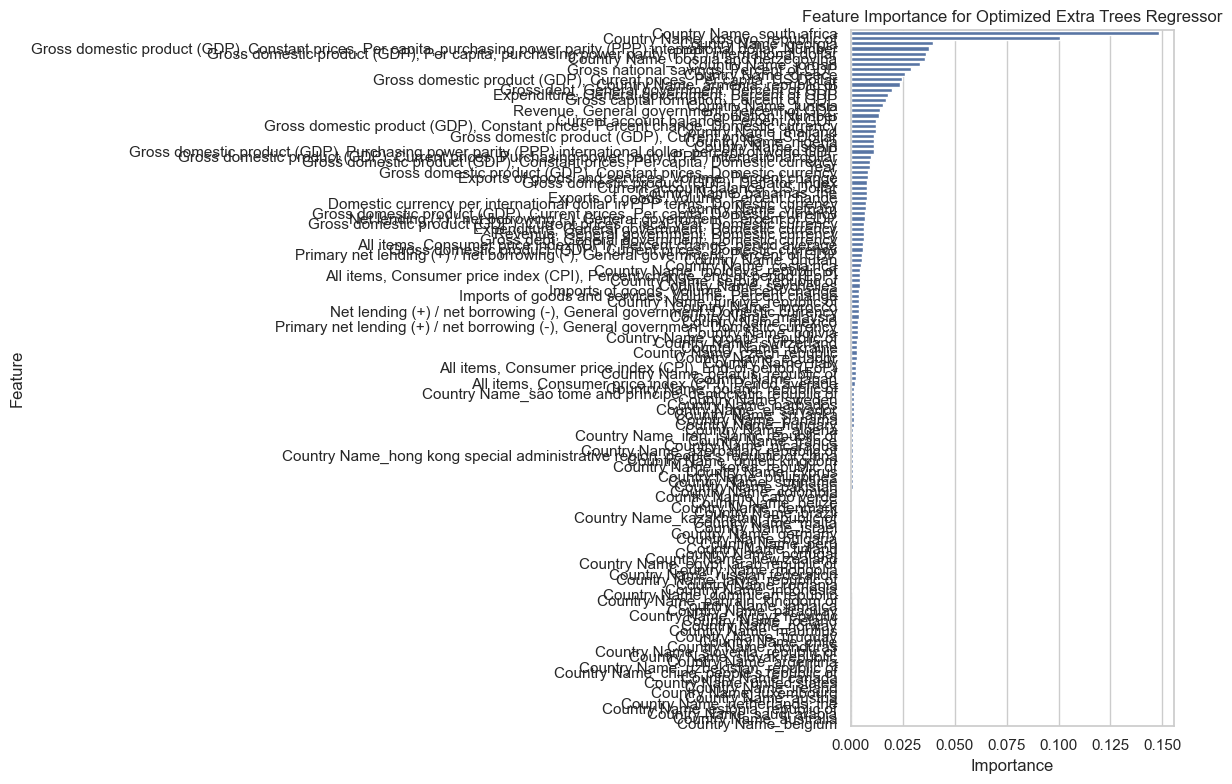

Correlation with 'Unemployment rate':

Unemployment rate                                                                                                        1.000000
Country Name_south africa                                                                                                0.439248
Country Name_kosovo, republic of                                                                                         0.305199
Country Name_jordan                                                                                                      0.220617
Country Name_georgia                                                                                                     0.220371
                                                                                                                           ...   
Current account balance, Percent of GDP                                                                                 -0.256514
Gross domestic product (GDP), Current prices, Per c

In [198]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"E:\Master's Courses\CSE533 Azk Spring 2025\project\unemployment_rate_dataset_cleaned.csv")  # use forward slashes for cross-platform compatibility

# One-hot encode the 'Country Name' column
df = pd.get_dummies(df, columns=['Country Name'], drop_first=True)

# Fill missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)  # numeric_only to avoid warnings with newer pandas versions

# Ensure target variable exists
if 'Unemployment rate' not in df.columns:
    raise ValueError("'Unemployment rate' column is missing from dataset!")

# Select features and target
features = df.drop(columns=['Unemployment rate'])
target = df['Unemployment rate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Extra Trees Regressor - Initial Model
et_model = ExtraTreesRegressor(random_state=42)
et_model.fit(X_train_scaled, y_train)

# Evaluate Initial Model
y_pred_initial = et_model.predict(X_test_scaled)
mae_initial = mean_absolute_error(y_test, y_pred_initial)
rmse_initial = np.sqrt(mean_squared_error(y_test, y_pred_initial))  
r2_initial = r2_score(y_test, y_pred_initial)
explained_variance_initial = explained_variance_score(y_test, y_pred_initial)

# Print Initial Model Evaluation
print(f" Extra Trees Model:")
print(f" MAE = {mae_initial:.4f}")
print(f" RMSE = {rmse_initial:.4f}")
print(f" R² = {r2_initial:.4f}")
print(f" Explained Variance = {explained_variance_initial:.4f}")

# Hyperparameter Tuning
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500, 700, 1000], 
    'max_depth': [None, 5, 10, 15, 20, 30, 40, 50, 60], 
    'min_samples_split': [2, 3, 5, 7, 10, 15, 20],  
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 8], 
    'max_features': ['sqrt', 'log2'],  
    'bootstrap': [True, False],  
    'criterion': ['squared_error', 'absolute_error'],  
}

et_random_search = RandomizedSearchCV(
    ExtraTreesRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    scoring='r2',  # R² is used as the scoring metric for regression
    cv= 5,  # 5-fold cross-validation
    verbose=1,  # controls the amount of information printed to the console during the execution
    random_state=42,
    n_jobs=-1
)

et_random_search.fit(X_train_scaled, y_train)

# Best Extra Trees Model
best_et = et_random_search.best_estimator_
print(f"Best Parameters: {et_random_search.best_params_}\n")

# Evaluate Best Model
y_pred_best = best_et.predict(X_test_scaled)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))  
r2_best = r2_score(y_test, y_pred_best)
explained_variance_best = explained_variance_score(y_test, y_pred_best)

# Print Optimized Model Evaluation
print(f"Optimized Extra Trees Model:")
print(f" MAE = {mae_best:.4f}")
print(f" RMSE = {rmse_best:.4f}")
print(f" R² = {r2_best:.4f}")
print(f" Explained Variance = {explained_variance_best:.4f}")

# Cross-Validation for Robustness
cv_scores = cross_val_score(best_et, X_train_scaled, y_train, cv=5, scoring='r2', n_jobs=-1)
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R²: {np.mean(cv_scores):.4f}\n")

# Residual Analysis
residuals = y_test - y_pred_best
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residual Distribution for Optimized Extra Trees")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Feature Importance
importances = best_et.feature_importances_
features_df = pd.DataFrame({'Feature': features.columns, 'Importance': importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title("Feature Importance for Optimized Extra Trees Regressor")
plt.tight_layout()
plt.show()

# Correlations with Target
correlation_matrix = df.corr(numeric_only=True)  # ensure no warning in new pandas versions
print("Correlation with 'Unemployment rate':\n")
print(correlation_matrix['Unemployment rate'].sort_values(ascending=False))


In [199]:
import pandas as pd

# Create the Data
data = {
    'Metric': ['MAE', 'RMSE', 'R²', 'Explained Variance', 'Mean Cross-Validation R²'],
    'Initial Extra Trees': [0.8631, 1.4047, 0.9334, 0.9341, '-'],
    'Optimized Extra Trees': [1.1912, 1.7183, 0.9003, 0.9003, 0.8225]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the table
print(df.to_string(index=False))


                  Metric Initial Extra Trees  Optimized Extra Trees
                     MAE              0.8631                 1.1912
                    RMSE              1.4047                 1.7183
                      R²              0.9334                 0.9003
      Explained Variance              0.9341                 0.9003
Mean Cross-Validation R²                   -                 0.8225


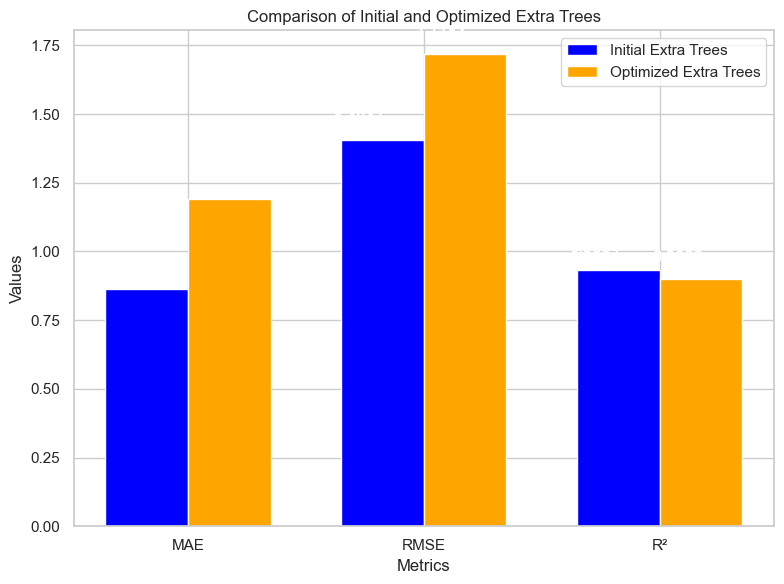

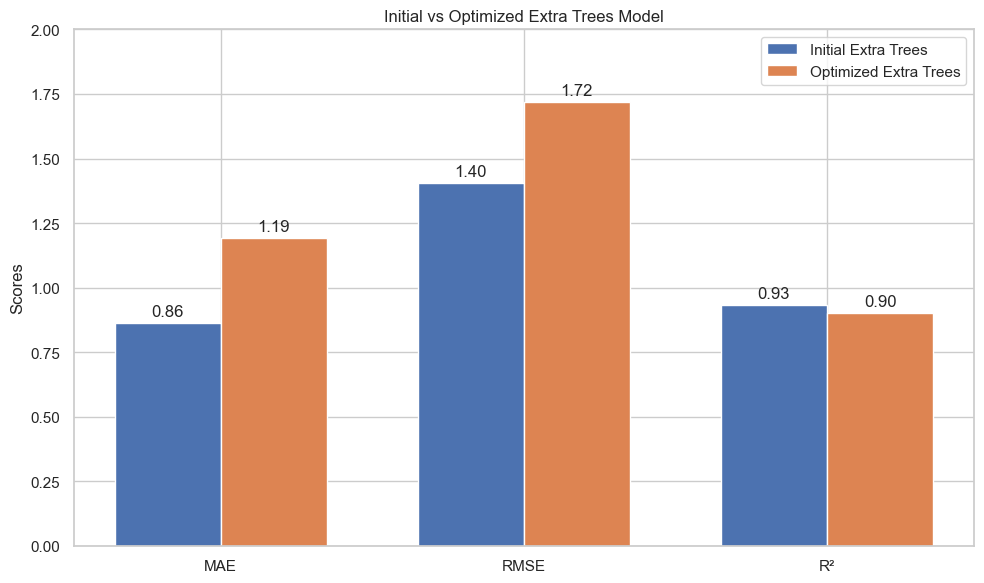

In [206]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics and Values
metrics = ['MAE', 'RMSE', 'R²']
initial_model = [0.8631, 1.4047, 0.9334]
optimized_model = [1.1912, 1.7183, 0.9003]

x = np.arange(len(metrics))  # label locations
width = 0.35  # width of bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, initial_model, width, label='Initial Extra Trees')
rects2 = ax.bar(x + width/2, optimized_model, width, label='Optimized Extra Trees')

# Add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Initial vs Optimized Extra Trees Model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Display values on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, 2)  # Set y-axis limit for better visualization
plt.tight_layout()
plt.show()


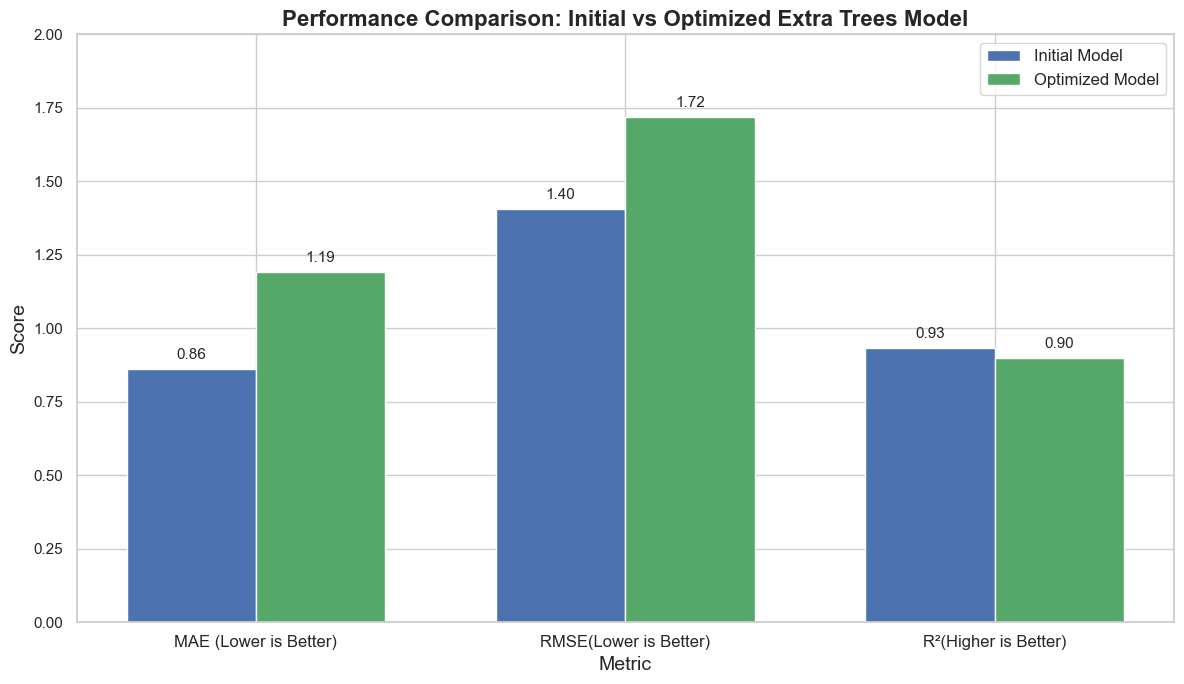

In [211]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Use Seaborn style
sns.set_theme(style="whitegrid")

# Metrics and Values
metrics = ['MAE (Lower is Better)', 'RMSE(Lower is Better)', 'R²(Higher is Better)']
initial_model = [0.8631, 1.4047, 0.9334]
optimized_model = [1.1912, 1.7183, 0.9003]

x = np.arange(len(metrics))  # label locations
width = 0.35  # width of bars

fig, ax = plt.subplots(figsize=(12,7))

# Bar plots
rects1 = ax.bar(x - width/2, initial_model, width, label='Initial Model', color='#4C72B0')
rects2 = ax.bar(x + width/2, optimized_model, width, label='Optimized Model', color='#55A868')

# Labels, title and axes
ax.set_ylabel('Score', fontsize=14)
ax.set_xlabel('Metric', fontsize=14)
ax.set_title('Performance Comparison: Initial vs Optimized Extra Trees Model', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(fontsize=12)

# Grid for easier reading
ax.yaxis.grid(True)

# Display values on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height != 0:
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 5),  # 5 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=11)

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, 2)  # Focused y-axis
plt.tight_layout()
plt.show()


Training Time: 2.1761 seconds
Initial Extra Trees Model:
 MAE = 0.8631
 MSE = 1.9732
 RMSE = 1.4047
 R² = 0.9334
 Explained Variance = 0.9341


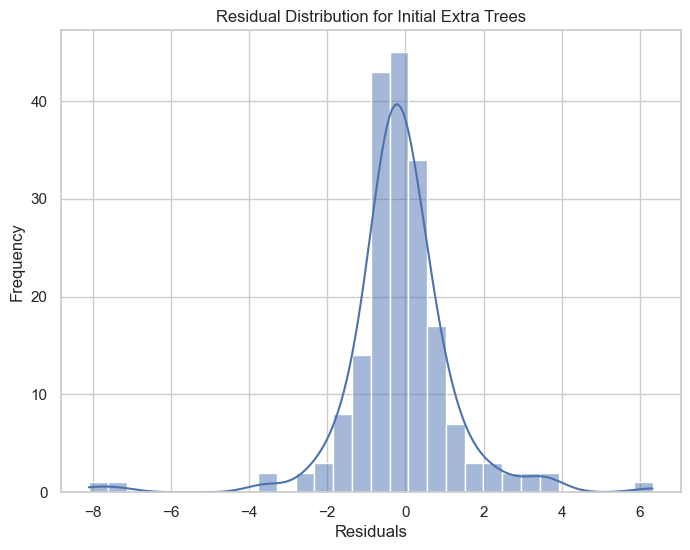

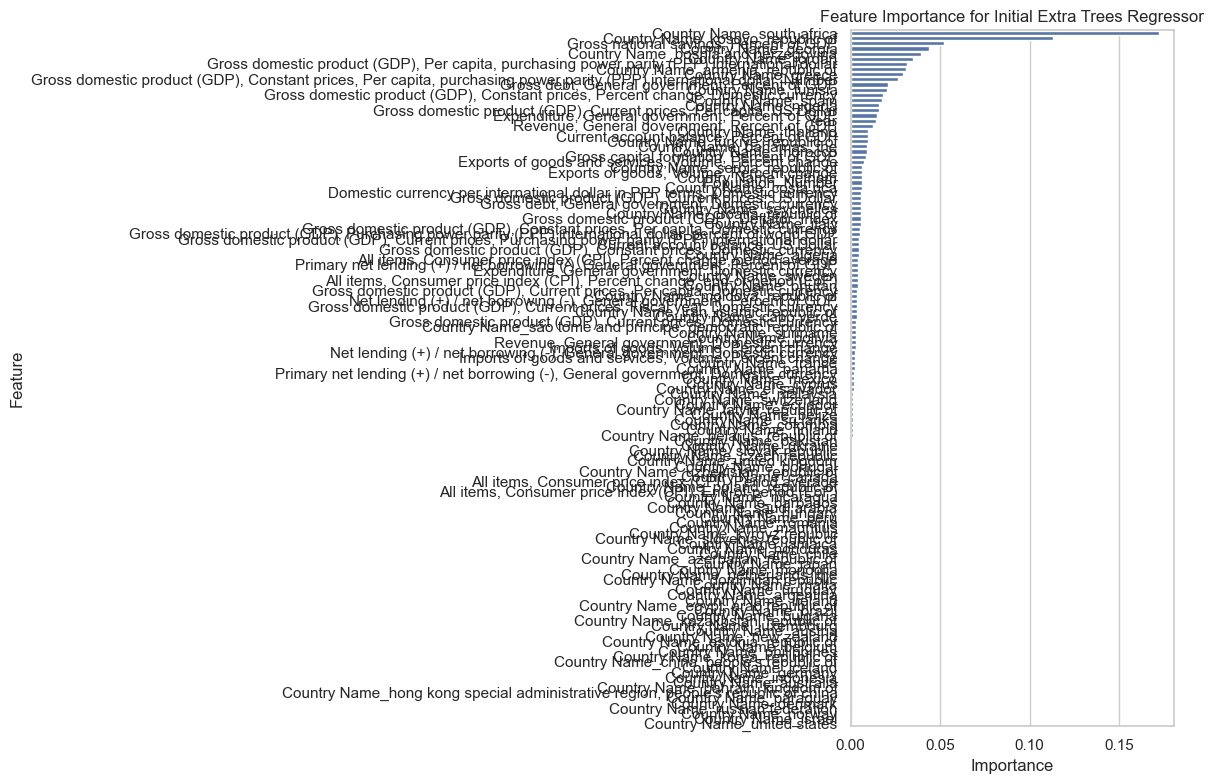

Correlation with 'Unemployment rate':

Unemployment rate                                                                                                        1.000000
Country Name_south africa                                                                                                0.439248
Country Name_kosovo, republic of                                                                                         0.305199
Country Name_jordan                                                                                                      0.220617
Country Name_georgia                                                                                                     0.220371
                                                                                                                           ...   
Current account balance, Percent of GDP                                                                                 -0.256514
Gross domestic product (GDP), Current prices, Per c

In [186]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import seaborn as sns
import matplotlib.pyplot as plt
import time  # To measure training time

# Load dataset
df = pd.read_csv(r"E:\Master's Courses\CSE533 Azk Spring 2025\project\unemployment_rate_dataset_cleaned.csv")  # use forward slashes for cross-platform compatibility

# One-hot encode the 'Country Name' column
df = pd.get_dummies(df, columns=['Country Name'], drop_first=True)

# Fill missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Ensure target variable exists
if 'Unemployment rate' not in df.columns:
    raise ValueError("'Unemployment rate' column is missing from dataset!")

# Select features and target
features = df.drop(columns=['Unemployment rate'])
target = df['Unemployment rate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Extra Trees Regressor - Initial Model
et_model = ExtraTreesRegressor(random_state=42)

# Measure training time
start_time = time.time()
et_model.fit(X_train_scaled, y_train)
end_time = time.time()

# Training time
training_time = end_time - start_time

# Evaluate Initial Model
y_pred_initial = et_model.predict(X_test_scaled)

# Calculate all error metrics
mae_initial = mean_absolute_error(y_test, y_pred_initial)
mse_initial = mean_squared_error(y_test, y_pred_initial)
rmse_initial = np.sqrt(mse_initial)
r2_initial = r2_score(y_test, y_pred_initial)
explained_variance = explained_variance_score(y_test, y_pred_initial)

# Print Results
print(f"Training Time: {training_time:.4f} seconds")
print(f" Extra Trees Model:")
print(f" MAE = {mae_initial:.4f}")
print(f" MSE = {mse_initial:.4f}")
print(f" RMSE = {rmse_initial:.4f}")
print(f" R² = {r2_initial:.4f}")
print(f" Explained Variance = {explained_variance:.4f}")

# Residual Analysis
residuals = y_test - y_pred_initial
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residual Distribution for Initial Extra Trees")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Feature Importance
importances = et_model.feature_importances_
features_df = pd.DataFrame({'Feature': features.columns, 'Importance': importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title("Feature Importance for Initial Extra Trees Regressor")
plt.tight_layout()
plt.show()

# Correlations with Target
correlation_matrix = df.corr(numeric_only=True)
print("Correlation with 'Unemployment rate':\n")
print(correlation_matrix['Unemployment rate'].sort_values(ascending=False))


In [147]:
import sklearn
print(sklearn.__version__)


1.6.1


# KMeans Clustering based on Unemployment rate

## Load Data 

In [155]:
!pip install dowhy

  Using cached dowhy-0.12-py3-none-any.whl.metadata (18 kB)
  Using cached Cython-0.29.37-py2.py3-none-any.whl.metadata (3.1 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached dowhy-0.12-py3-none-any.whl (398 kB)
   ---------------------------------------- 0.0/192.6 kB ? eta -:--:--
   ------ --------------------------------- 30.7/192.6 kB 1.3 MB/s eta 0:00:01
   -------------- ------------------------ 71.7/192.6 kB 991.0 kB/s eta 0:00:01
   ------------------------------- -------- 153.6/192.6 kB 1.5 MB/s eta 0:00:01
   ------------------------------------ --- 174.1/192.6 kB 1.3 MB/s eta 0:00:01
   ------------------------------------ --- 174.1/192.6 kB 1.3 MB/s eta 0:00:01
   ------------------------------------ --- 174.1/192.6 kB 1.3 MB/s eta 0:00:01
   ------------------------------------ --- 174.1/192.6 kB 1.3 MB/s eta 0:00:01
   ------------------------------------ --- 174.1/192.6 kB 1.3 MB/s eta 0:00:01
   ------------------------------------ - 184


[notice] A new release of pip is available: 23.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [171]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from dowhy import CausalModel

data = pd.read_csv(r"E:\Master's Courses\CSE533 Azk Spring 2025\project\unemployment_rate_dataset_cleaned.csv")

# Convert 'Country Name' to numerical encoding
data['Country Name'] = data['Country Name'].astype('category').cat.codes

In [172]:
# # Step 1: Preprocess the data - Focus on 'Unemployment rate' column
# data['Unemployment rate'] = pd.to_numeric(data['Unemployment rate'], errors='coerce')
# data = data.dropna(subset=['Unemployment rate']) 

##  Normalize the 'Unemployment rate' column

In [173]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Unemployment rate']])

## Apply K-means clustering to the data (3 clusters: high, medium, low unemployment rate)

In [174]:

kmeans = KMeans(n_clusters=3, random_state=42)
data['Employment Cluster'] = kmeans.fit_predict(data_scaled)

## Analyze the cluster centers to understand the unemployment rate ranges

In [175]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Unemployment rate'])
cluster_centers['Cluster'] = range(3)
print("Cluster Centers (Unemployment rate):")
print(cluster_centers)

Cluster Centers (Unemployment rate):
   Unemployment rate  Cluster
0          -0.563459        0
1           0.557109        1
2           2.810253        2


## Assign categories based on cluster centers (interpreting high, medium, low)

In [176]:
# Sorting the centers by unemployment rate
cluster_centers_sorted = cluster_centers.sort_values(by='Unemployment rate')

# Assign labels based on sorted cluster centers
cluster_labels = {cluster_centers_sorted.iloc[0]['Cluster']: 'Low',
                  cluster_centers_sorted.iloc[1]['Cluster']: 'Medium',
                  cluster_centers_sorted.iloc[2]['Cluster']: 'High'}

data['Employment Category'] = data['Employment Cluster'].map(cluster_labels)

## Inspect the data with cluster assignments

In [177]:
print("First few rows with cluster labels:")
print(data[['Country Name', 'Unemployment rate', 'Employment Category']].head(20))

First few rows with cluster labels:
    Country Name  Unemployment rate Employment Category
0              0             17.100                High
1              0             15.200              Medium
2              0             13.700              Medium
3              0             12.300              Medium
4              0             11.470              Medium
5              0             11.675              Medium
6              0             11.500              Medium
7              0             10.900              Medium
8              0             10.700              Medium
9              0             10.700              Medium
10             2              8.350              Medium
11             2              9.200              Medium
12             2              9.825              Medium
13             2             11.550              Medium
14             2              8.750              Medium
15             2              6.825                 Low
16          

## Visualize the clustering results

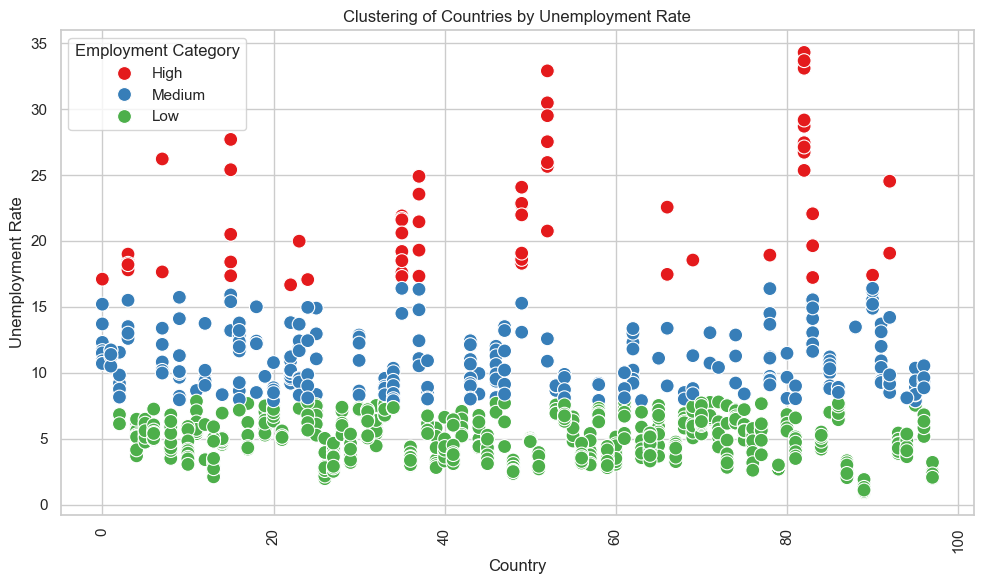

In [178]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Country Name'], y=data['Unemployment rate'], hue=data['Employment Category'], palette='Set1', s=100)
plt.xticks(rotation=90)  # Rotate country names for better readability
plt.xlabel('Country')
plt.ylabel('Unemployment Rate')
plt.title('Clustering of Countries by Unemployment Rate')
plt.legend(title='Employment Category')
plt.tight_layout()
plt.show()

C:\Users\88018\AppData\Local\Temp\ipykernel_5828\137736692.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Employment Category', data=data, palette='viridis')


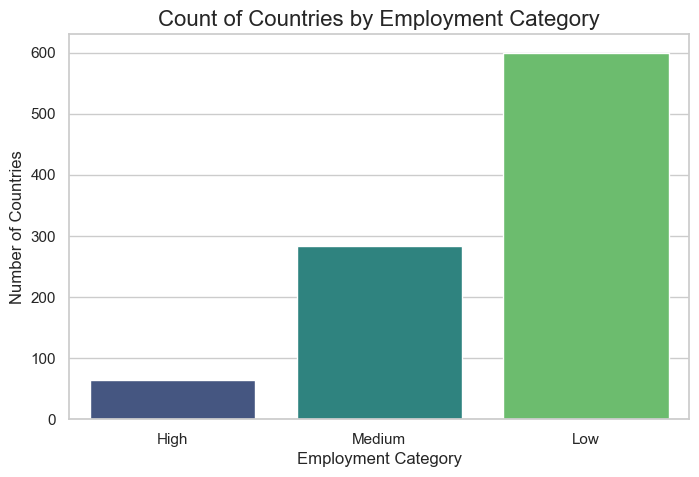

C:\Users\88018\AppData\Local\Temp\ipykernel_5828\137736692.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Employment Category', y='Unemployment rate', data=data, palette='coolwarm')


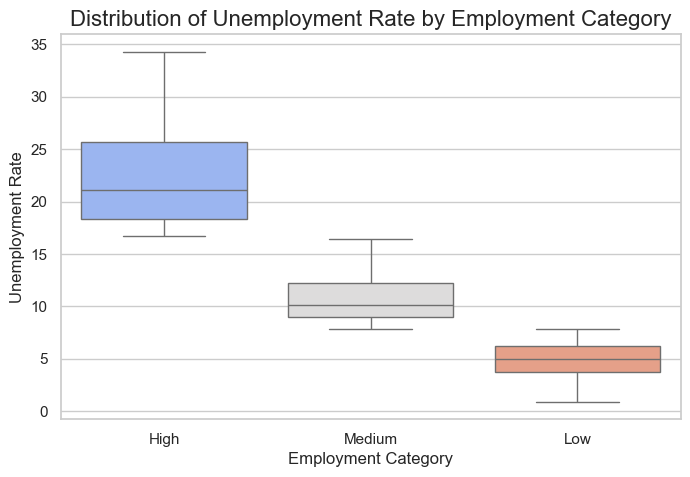

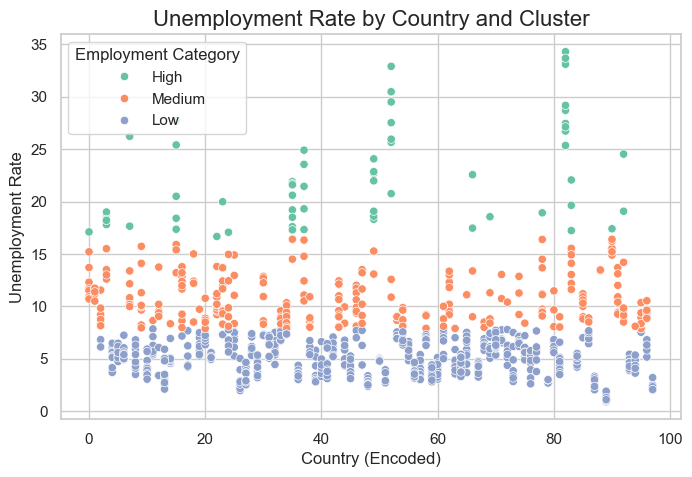

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cluster Distribution Bar Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='Employment Category', data=data, palette='viridis')
plt.title('Count of Countries by Employment Category', fontsize=16)
plt.xlabel('Employment Category', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.show()

# Box Plot of Unemployment Rate by Cluster
plt.figure(figsize=(8, 5))
sns.boxplot(x='Employment Category', y='Unemployment rate', data=data, palette='coolwarm')
plt.title('Distribution of Unemployment Rate by Employment Category', fontsize=16)
plt.xlabel('Employment Category', fontsize=12)
plt.ylabel('Unemployment Rate', fontsize=12)
plt.show()

# Scatter Plot of Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Country Name'], y=data['Unemployment rate'], hue=data['Employment Category'], palette='Set2')
plt.title('Unemployment Rate by Country and Cluster', fontsize=16)
plt.xlabel('Country (Encoded)', fontsize=12)
plt.ylabel('Unemployment Rate', fontsize=12)
plt.legend(title='Employment Category')
plt.show()


## Find how many values in each clusters

In [180]:
print("\nCluster distribution:")
print(data['Employment Category'].value_counts())


Cluster distribution:
Employment Category
Low       600
Medium    284
High       64
Name: count, dtype: int64


# Causal Effect Estimation from Unemploymnet Rate Based Clusters   

## Sort by Country and Year

In [181]:
data = data.sort_values(by=['Country Name', 'Year'])

## Feature Engineering

In [182]:
# Create lagged government spending column
data['Lagged Govt Spending'] = data.groupby('Country Name')['Expenditure, General government, Percent of GDP'].shift(1)

# Drop rows where lagged values are missing
data = data.dropna(subset=['Lagged Govt Spending'])

## Causal Analysis

In [183]:
import dowhy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Store the causal effect estimates for visualization
causal_effects = {}

# Proceed with causal analysis
for category in ['Low', 'Medium', 'High']:
    print(f"\nAnalyzing category: {category}")
    
    # Filter data for the current cluster
    cluster_data = data[data['Employment Category'] == category]
    
    # Ensure required columns exist and no missing values
    required_columns = [
        'Unemployment rate',  # Outcome
        'Expenditure, General government, Percent of GDP',  # Treatment
        'Gross national savings, Percent of GDP',  # Control
        'Population, Number',  # Control
        'Gross domestic product (GDP), Current prices, Per capita, US Dollar',  # Control
        'Lagged Govt Spending'  # Instrument
    ]
    cluster_data = cluster_data.dropna(subset=required_columns)
    
    # Rename columns for simplicity
    cluster_data = cluster_data.rename(columns={
        'Unemployment rate': 'Unemployment_Rate',
        'Expenditure, General government, Percent of GDP': 'Govt_Spending',
        'Gross national savings, Percent of GDP': 'Savings_Rate',
        'Population, Number': 'Population',
        'Gross domestic product (GDP), Current prices, Per capita, US Dollar': 'GDP_Per_Capita',
        'Lagged Govt Spending': 'Instrument'
    })
    
    # Create DoWhy causal model
    model = dowhy.CausalModel(
        data=cluster_data,
        treatment='Govt_Spending',
        outcome='Unemployment_Rate',
        common_causes=['Savings_Rate', 'Population', 'GDP_Per_Capita'],
        instruments=['Instrument']
    )
    
    # Identify the causal effect
    identified_estimand = model.identify_effect()
    print("Identified Estimand:")
    print(identified_estimand)
    
    # Estimate the causal effect using IV method
    causal_estimate = model.estimate_effect(identified_estimand,
                                            method_name="iv.instrumental_variable")
    print(f"Causal Effect Estimate for {category} (IV): {causal_estimate.value}")
    
    # Store the causal effect for this category
    causal_effects[category] = causal_estimate.value





Analyzing category: Low
Identified Estimand:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                       ↪
────────────────(E[Unemployment_Rate|Savings_R ↪
d[Govt_Spending]                               ↪

↪                                
↪ ate,Population,GDP_Per_Capita])
↪                                
Estimand assumption 1, Unconfoundedness: If U→{Govt_Spending} and U→Unemployment_Rate then P(Unemployment_Rate|Govt_Spending,Savings_Rate,Population,GDP_Per_Capita,U) = P(Unemployment_Rate|Govt_Spending,Savings_Rate,Population,GDP_Per_Capita)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                             ↪
 ⎢      d                          ⎛      d    ↪
E⎢─────────────(Unemployment_Rate)⋅⎜────────── ↪
 ⎣d[Instrument]                    ⎝d[Instrume ↪

↪                      -1⎤
↪                     ⎞  ⎥
↪ ───([Govt_Spending])⎟  ⎥
↪ nt]            

## Unemploymnet Based Causal Effect Visualization

C:\Users\88018\AppData\Local\Temp\ipykernel_5828\375633357.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=effects, palette="viridis")


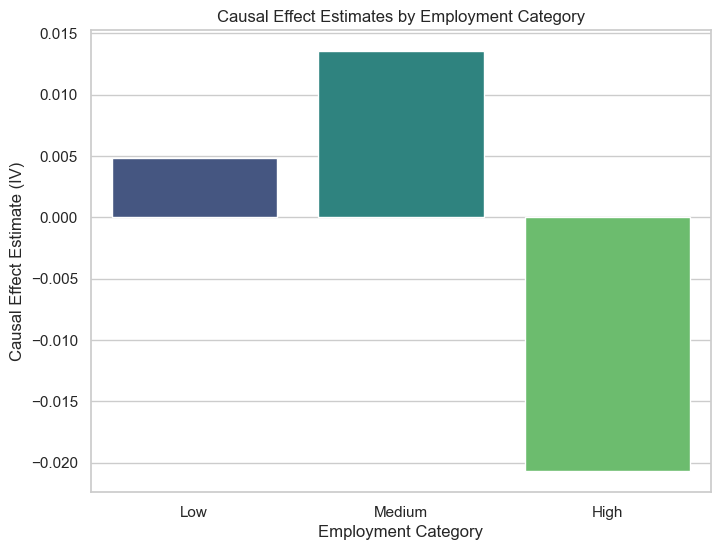

In [184]:
# Visualize the causal effects across categories
categories = list(causal_effects.keys())
effects = list(causal_effects.values())

plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=effects, palette="viridis")
plt.title('Causal Effect Estimates by Employment Category')
plt.xlabel('Employment Category')
plt.ylabel('Causal Effect Estimate (IV)')
plt.show()

# Granger Causality Test

A Granger Causality Test is a statistical hypothesis test used to determine whether one time series can predict or "cause" another time series. Specifically, it checks if past values of one variable can help predict future values of another variable, beyond what can be predicted using its own past values.

a lesser (smaller) p-value means a stronger and more significant Granger causality between the two variables.


Performing Granger Causality test between 'Unemployment rate' and 'Gross domestic product (GDP), Current prices, Per capita, US Dollar'...

Performing Granger Causality test between 'Unemployment rate' and 'Current account balance, Percent of GDP'...

Performing Granger Causality test between 'Unemployment rate' and 'Gross national savings, Percent of GDP'...


C:\python\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\python\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\python\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\python\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Performing Granger Causality test between 'Unemployment rate' and 'Gross capital formation, Percent of GDP'...

Performing Granger Causality test between 'Unemployment rate' and 'Revenue, General government, Percent of GDP'...

Performing Granger Causality test between 'Unemployment rate' and 'Expenditure, General government, Percent of GDP'...

Performing Granger Causality test between 'Unemployment rate' and 'Net lending (+) / net borrowing (-), General government, Percent of GDP'...

Performing Granger Causality test between 'Unemployment rate' and 'Gross debt, General government, Percent of GDP'...

Performing Granger Causality test between 'Unemployment rate' and 'Gross domestic product (GDP), Deflator, Index'...


C:\python\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\python\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\python\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\python\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\python\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\88018\AppData\Local\Temp\ipykernel_19352\2568326959.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

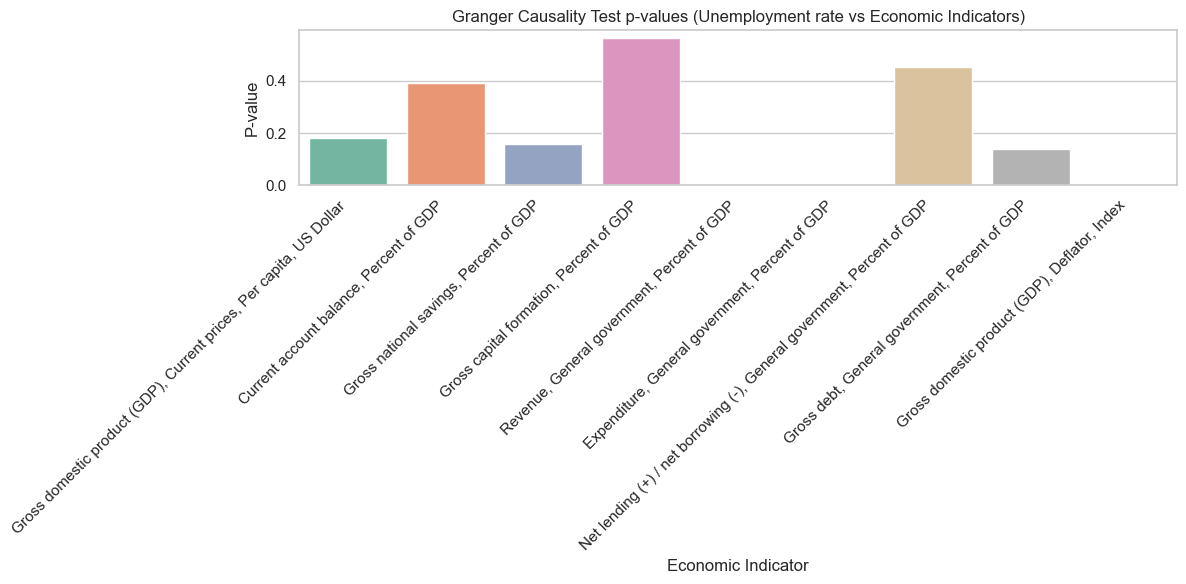

No significant Granger causality detected between 'Unemployment rate' and 'Gross domestic product (GDP), Current prices, Per capita, US Dollar' (p-value = 0.17924149741234408)
No significant Granger causality detected between 'Unemployment rate' and 'Current account balance, Percent of GDP' (p-value = 0.390111575962086)
No significant Granger causality detected between 'Unemployment rate' and 'Gross national savings, Percent of GDP' (p-value = 0.15953647872972426)
No significant Granger causality detected between 'Unemployment rate' and 'Gross capital formation, Percent of GDP' (p-value = 0.5649135001373364)
Granger causality detected: 'Unemployment rate' and 'Revenue, General government, Percent of GDP' are causally related (p-value = 0.0050384178321466085)
Granger causality detected: 'Unemployment rate' and 'Expenditure, General government, Percent of GDP' are causally related (p-value = 0.0028243887831865713)
No significant Granger causality detected between 'Unemployment rate' and 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests

# Load dataset
data = pd.read_csv(r"project\unemployment_rate_dataset.csv")

# Define features for causal analysis
economic_features = [
    'Unemployment rate',
    'Gross domestic product (GDP), Current prices, Per capita, US Dollar',
    'Current account balance, Percent of GDP',
    'Gross national savings, Percent of GDP',
    'Gross capital formation, Percent of GDP',
    'Revenue, General government, Percent of GDP',
    'Expenditure, General government, Percent of GDP',
    'Net lending (+) / net borrowing (-), General government, Percent of GDP',
    'Gross debt, General government, Percent of GDP',
    'Gross domestic product (GDP), Deflator, Index'
]

# Prepare data: Select relevant features and handle missing values
causal_data = data[economic_features].copy()
causal_data = causal_data.apply(pd.to_numeric, errors='coerce')  # Ensure numeric
causal_data = causal_data.dropna()  # Drop rows with missing values

# Perform Granger Causality test between 'Unemployment rate' and other variables
causal_results = {}

for feature in economic_features:
    if feature != 'Unemployment rate':  # We don't need to check unemployment rate with itself
        print(f"\nPerforming Granger Causality test between 'Unemployment rate' and '{feature}'...")
        # Granger Causality test (maxlag set to 4 as an example, adjust as needed)
        test_result = grangercausalitytests(causal_data[['Unemployment rate', feature]], maxlag=4, verbose=False)
        causal_results[feature] = test_result

# Extract p-values for the ssr_chi2test
causal_p_values = {}
for feature, test_result in causal_results.items():
    # Extract p-values for each lag (checking for the lowest p-value)
    min_p_value = min(test_result[lag][0]['ssr_chi2test'][1] for lag in test_result)
    causal_p_values[feature] = min_p_value

# Create a barplot for p-values
plt.figure(figsize=(12, 6))
sns.barplot(
    x=list(causal_p_values.keys()),
    y=list(causal_p_values.values()),
    palette='Set2'
)
plt.title('Granger Causality Test p-values (Unemployment rate vs Economic Indicators)')
plt.xlabel('Economic Indicator')
plt.ylabel('P-value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Interpretation: If the p-value is below a significance level (e.g., 0.05), there is a causal relationship.
for feature, p_value in causal_p_values.items():
    if p_value < 0.05:
        print(f"Granger causality detected: 'Unemployment rate' and '{feature}' are causally related (p-value = {p_value})")
    else:
        print(f"No significant Granger causality detected between 'Unemployment rate' and '{feature}' (p-value = {p_value})")


# Causal Effect Estimation from GDP indicators Based Clusters

In [239]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from linearmodels.iv import IV2SLS


# Load dataset
data = pd.read_csv(r"E:\Master's Courses\CSE533 Azk Spring 2025\project\unemployment_rate_dataset.csv")

## Economic Features

In [247]:
# Define features for clustering
economic_features = [
    'Unemployment rate',
    'Gross domestic product (GDP), Current prices, Per capita, US Dollar',
    'Current account balance, Percent of GDP',
    'Gross national savings, Percent of GDP',
    'Gross capital formation, Percent of GDP',
    'Revenue, General government, Percent of GDP',
    'Expenditure, General government, Percent of GDP',
    'Net lending (+) / net borrowing (-), General government, Percent of GDP',
    'Gross debt, General government, Percent of GDP',
    'Gross domestic product (GDP), Deflator, Index',
]

## Data Preparation

In [248]:
# Prepare data: Select relevant features and handle missing values
clustering_data = data[economic_features].copy()
clustering_data = clustering_data.apply(pd.to_numeric, errors='coerce')  # Ensure numeric
clustering_data = clustering_data.dropna()  # Drop rows with missing values

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

## Perform Clustering

In [249]:
# Perform clustering with the chosen number of clusters (set by Elbow Method earlier)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(scaled_data)

## Visualization

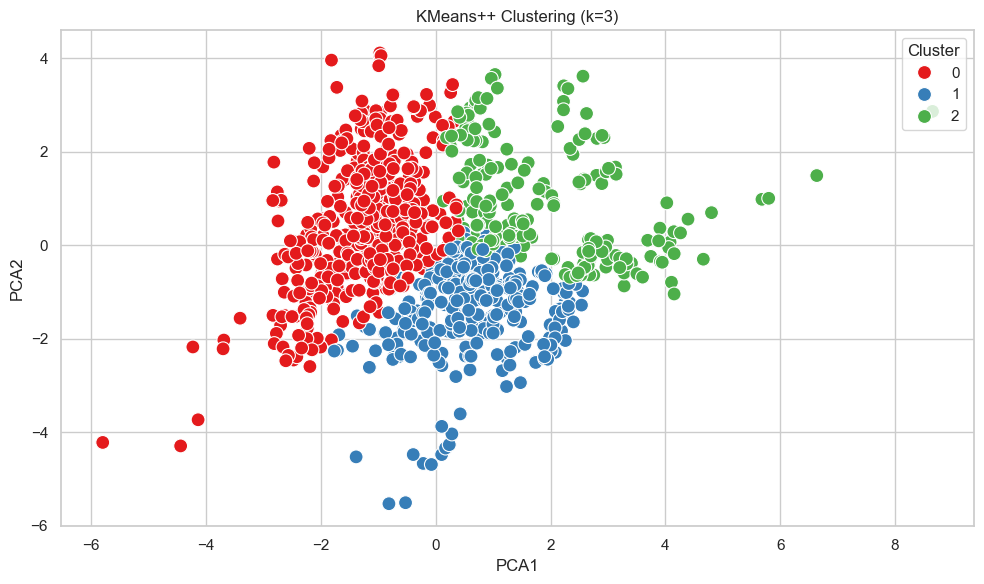


Cluster Characteristics:
         Unemployment rate  \
Cluster                      
0                 9.178240   
1                 7.956319   
2                 4.358161   

         Gross domestic product (GDP), Current prices, Per capita, US Dollar  \
Cluster                                                                        
0                                              8274.216043                     
1                                             28000.686959                     
2                                             49575.925698                     

         Current account balance, Percent of GDP  \
Cluster                                            
0                                      -4.251300   
1                                      -1.081847   
2                                       6.417459   

         Gross national savings, Percent of GDP  \
Cluster                                           
0                                     22.079342   
1       

In [250]:
# PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
clustering_data['PCA1'] = pca_data[:, 0]
clustering_data['PCA2'] = pca_data[:, 1]

# Visualization of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=clustering_data, palette='Set1', s=100
)
plt.title(f'KMeans++ Clustering (k={optimal_clusters})')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
plt.show()

# Analyze Cluster Characteristics
cluster_summary = clustering_data.groupby('Cluster')[economic_features].mean()
print("\nCluster Characteristics:")
print(cluster_summary)

## Heatmap of Cluster Characteristics

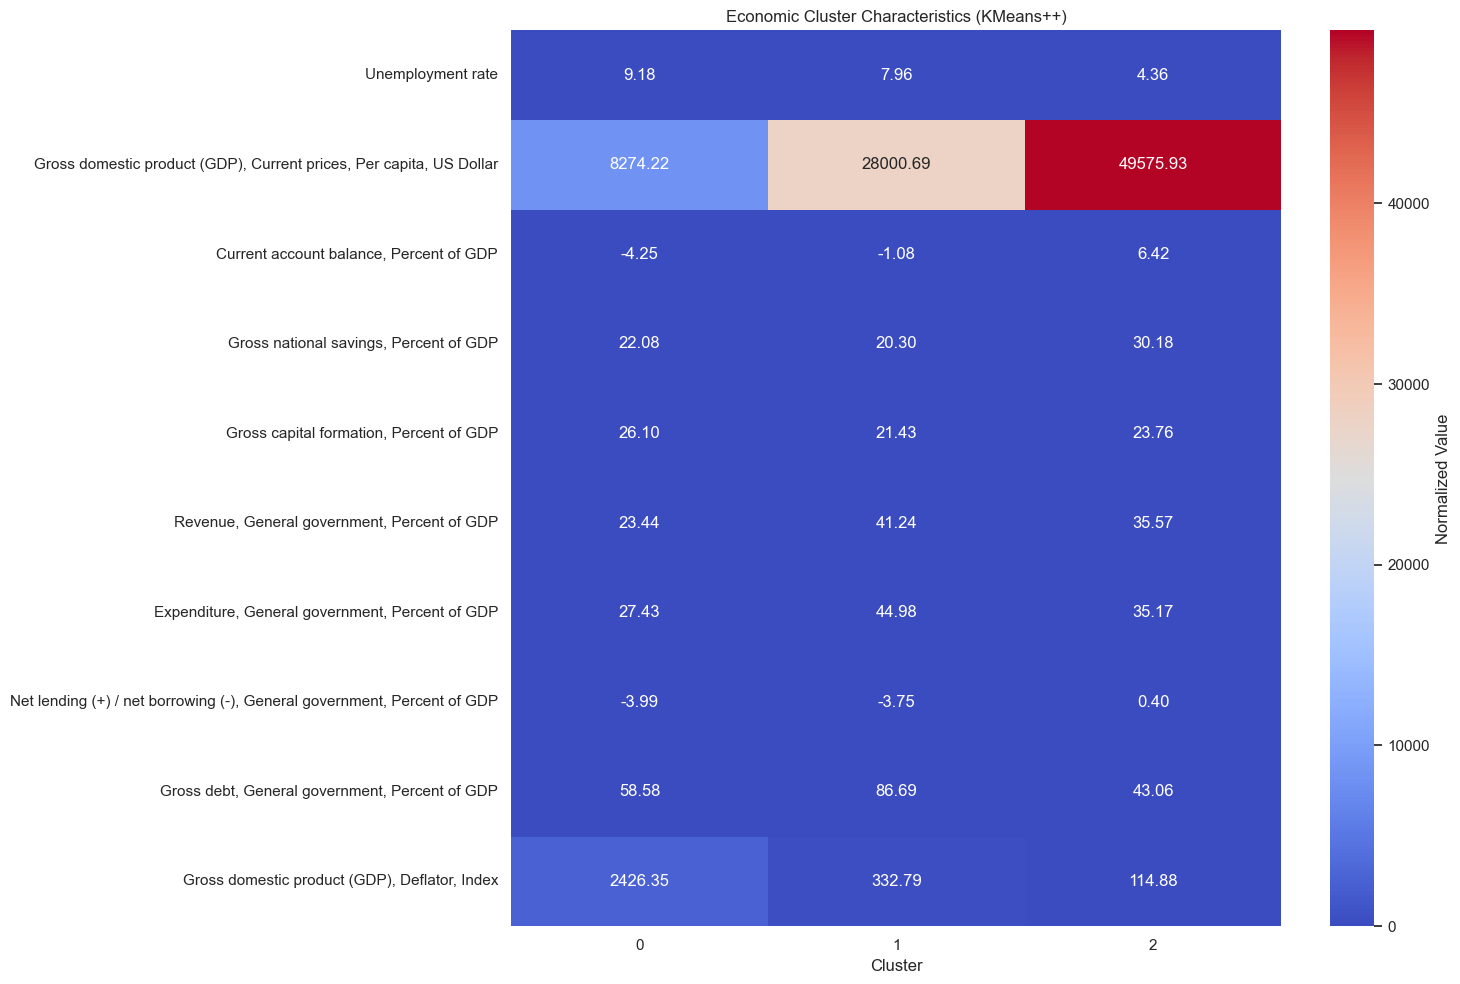

In [251]:
# Heatmap of Cluster Characteristics
plt.figure(figsize=(15, 10))
sns.heatmap(cluster_summary.T, cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'Normalized Value'})
plt.title('Economic Cluster Characteristics (KMeans++)')
plt.tight_layout()
plt.show()

## Cluster Distribution

In [252]:
# Cluster Distribution
cluster_distribution = clustering_data['Cluster'].value_counts()
print("\nCluster Distribution:")
print(cluster_distribution)


Cluster Distribution:
Cluster
0    483
1    295
2    205
Name: count, dtype: int64


## Support Vector Regression for Government Spending's Effect on GDP Growth for Each Cluster

In [246]:
# Perform Support Vector Regression for government spending's effect on GDP growth for each cluster
regression_results_svr = {}

for cluster in range(optimal_clusters):
    print(f"\nAnalyzing Cluster {cluster} for Government Spending Effectiveness on Unemployment rate...")
    
    # Filter data for the current cluster
    cluster_data = clustering_data[clustering_data['Cluster'] == cluster]
    
    # Prepare data for regression analysis
    causal_data = cluster_data.copy()
    causal_data.drop(columns=['Cluster', 'PCA1', 'PCA2'], inplace=True)  # Drop unnecessary columns
    
    # Define independent variables (controls) and dependent variable (outcome)
    X = causal_data[['Expenditure, General government, Percent of GDP']]  # Government spending
    y = causal_data[   'Unemployment rate']  # GDP growth
    # Perform Support Vector Regression
    svr_model = SVR(kernel='linear')
    svr_model.fit(X, y)
    
    # Store the SVR coefficient (effect of government spending on GDP)
    regression_results_svr[cluster] = svr_model.coef_[0]
    print(f"SVR Coefficient for Cluster {cluster}: {svr_model.coef_[0]}")


Analyzing Cluster 0 for Government Spending Effectiveness on Unemployment rate...
SVR Coefficient for Cluster 0: [0.01948407]

Analyzing Cluster 1 for Government Spending Effectiveness on Unemployment rate...
SVR Coefficient for Cluster 1: [0.00978125]

Analyzing Cluster 2 for Government Spending Effectiveness on Unemployment rate...
SVR Coefficient for Cluster 2: [0.09612742]


In [ ]:
from sklearn.linear_model import LinearRegression

# Define features for clustering (only include variables with significant Granger causality)
economic_features = [
    'Unemployment rate',
    'Gross domestic product (GDP), Current prices, Per capita, US Dollar',
    'Current account balance, Percent of GDP',
    'Gross national savings, Percent of GDP',
    'Gross capital formation, Percent of GDP',
    'Revenue, General government, Percent of GDP',
    'Expenditure, General government, Percent of GDP',
    'Net lending (+) / net borrowing (-), General government, Percent of GDP',
    'Gross debt, General government, Percent of GDP',
    'Gross domestic product (GDP), Deflator, Index',
]
# Perform Linear Regression for economic features' effect on Unemployment rate for each cluster
regression_results_lr = {}

for cluster in range(optimal_clusters):
    print(f"\nAnalyzing Cluster {cluster} for Effectiveness of economic_features on Unemployment rate...")
    
    # Filter data for the current cluster
    cluster_data = clustering_data[clustering_data['Cluster'] == cluster]
    
    # Prepare data for regression analysis
    causal_data = cluster_data.copy()
    causal_data.drop(columns=['Cluster', 'PCA1', 'PCA2'], inplace=True)  # Drop unnecessary columns
    
    # Define independent variables (controls) and dependent variable (outcome)
    X = causal_data[economic_features]  # Economic features
    y = causal_data['Unemployment rate']  # Unemployment rate
    
    # Perform Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X, y)
    
    # Store the Linear Regression coefficients (effect of economic features on Unemployment rate)
    regression_results_lr[cluster] = lr_model.coef_
    print(f"Linear Regression Coefficients for Cluster {cluster}: {lr_model.coef_}")


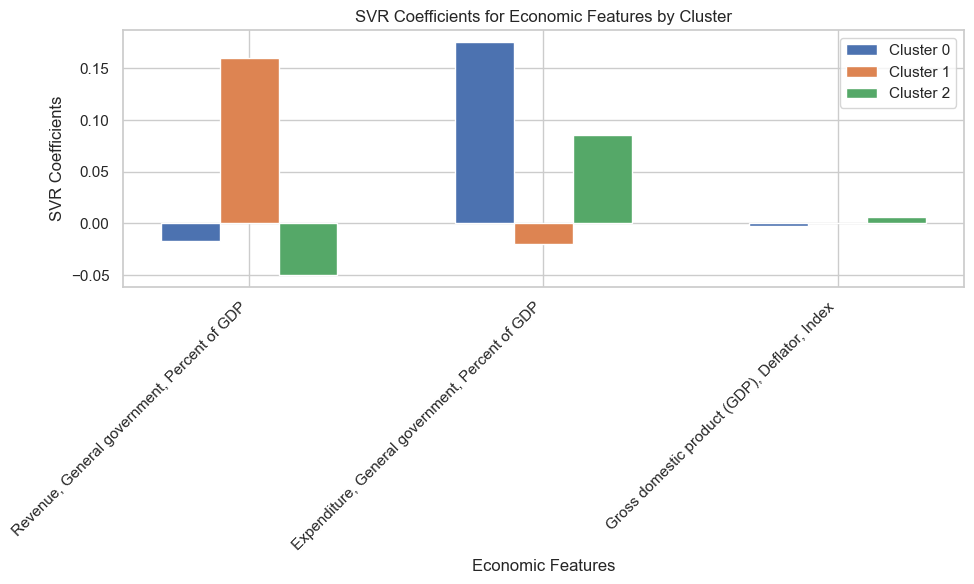

In [263]:
# Visualization of SVR coefficients for different clusters
plt.figure(figsize=(10, 6))

# Convert the SVR coefficients dictionary to a numpy array for easier plotting
clusters = list(regression_results_svr.keys())
coefficients = [regression_results_svr[cluster].flatten() for cluster in clusters]

# Prepare data for bar plot
coefficients_matrix = np.array(coefficients)
num_features = coefficients_matrix.shape[1]
x = np.arange(num_features)

# Plot coefficients for each cluster
width = 0.2  # Bar width
for i, cluster in enumerate(clusters):
    plt.bar(x + i * width, coefficients_matrix[i], width=width, label=f'Cluster {cluster}')

# Add feature names as x-ticks
plt.xticks(x + width * (len(clusters) - 1) / 2, economic_features, rotation=45, ha='right')

# Add labels and title
plt.xlabel('Economic Features')
plt.ylabel('SVR Coefficients')
plt.title('SVR Coefficients for Economic Features by Cluster')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


Analyzing Cluster 0 for Government Spending Effectiveness on Unemployment rate...


Using 483 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SVR Coefficients for Cluster 0: [[-0.01739158  0.17541909 -0.00217617]]


  0%|          | 0/483 [00:00<?, ?it/s]

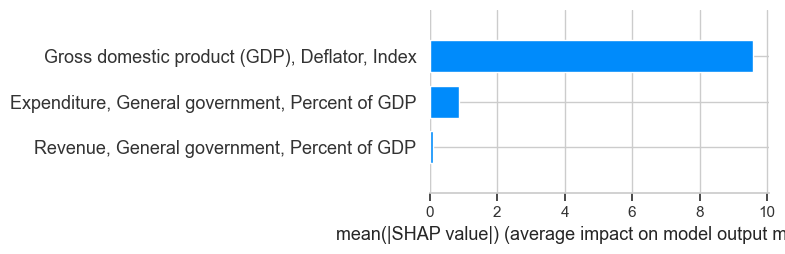

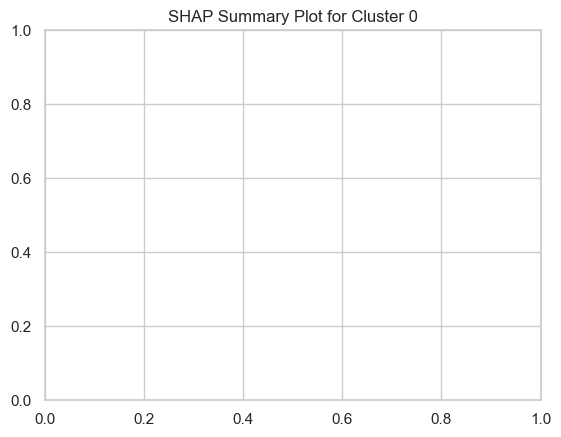


Analyzing Cluster 1 for Government Spending Effectiveness on Unemployment rate...


Using 295 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SVR Coefficients for Cluster 1: [[ 0.16021018 -0.01954618  0.00070141]]


  0%|          | 0/295 [00:00<?, ?it/s]

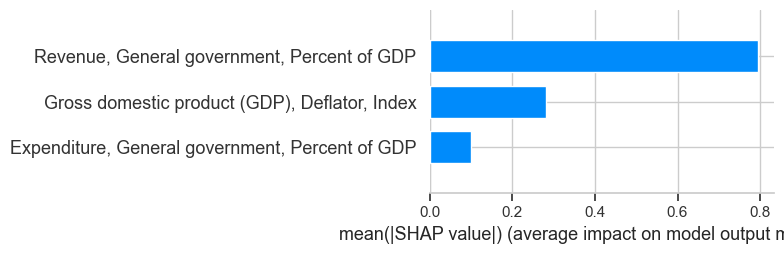

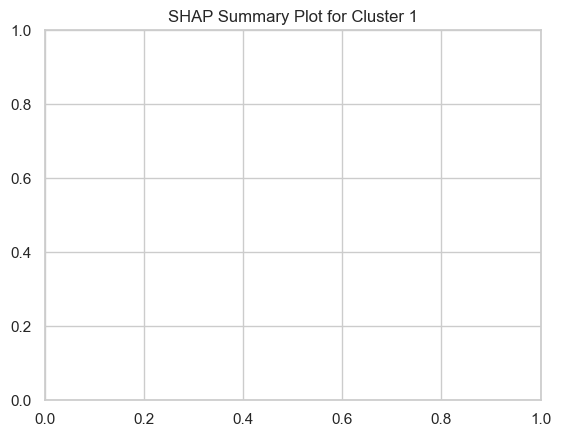

Using 205 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.



Analyzing Cluster 2 for Government Spending Effectiveness on Unemployment rate...
SVR Coefficients for Cluster 2: [[-0.04999387  0.08569247  0.00606844]]


  0%|          | 0/205 [00:00<?, ?it/s]

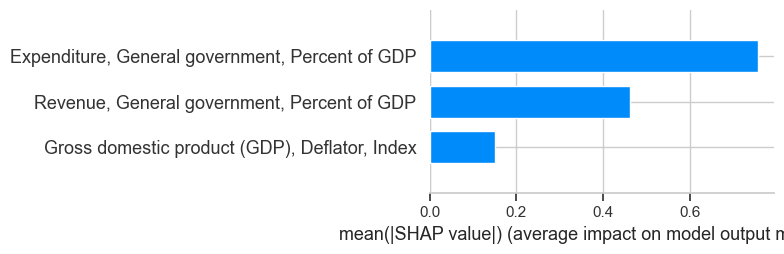

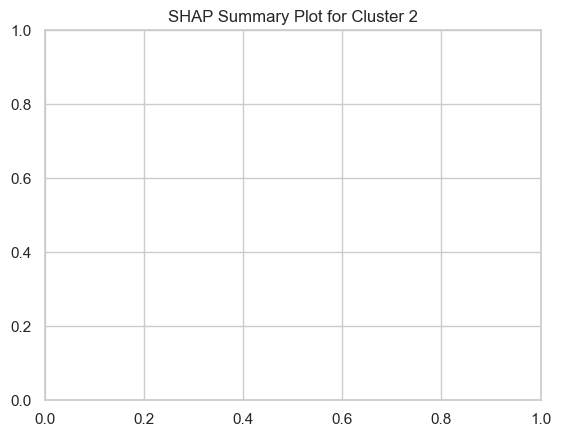

In [262]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR

# Define features for clustering (only include variables with significant Granger causality)
economic_features = [
    'Revenue, General government, Percent of GDP',  # Significant Granger causality with Unemployment rate
    'Expenditure, General government, Percent of GDP',  # Significant Granger causality with Unemployment rate
    'Gross domestic product (GDP), Deflator, Index',  # Significant Granger causality with Unemployment rate
]

# Perform Support Vector Regression for government spending's effect on Unemployment rate for each cluster
regression_results_svr = {}

# Prepare SHAP explainer and visualization
for cluster in range(optimal_clusters):
    print(f"\nAnalyzing Cluster {cluster} for Government Spending Effectiveness on Unemployment rate...")
    
    # Filter data for the current cluster
    cluster_data = clustering_data[clustering_data['Cluster'] == cluster]
    
    # Prepare data for regression analysis
    causal_data = cluster_data.copy()
    causal_data.drop(columns=['Cluster', 'PCA1', 'PCA2'], inplace=True)  # Drop unnecessary columns
    
    # Define independent variables (controls) and dependent variable (outcome)
    X = causal_data[economic_features]  # Government spending and other relevant features
    y = causal_data['Unemployment rate']  # Unemployment rate
    
    # Perform Support Vector Regression
    svr_model = SVR(kernel='linear')
    svr_model.fit(X, y)
    
    # Store the SVR coefficients (effect of government spending on Unemployment rate)
    regression_results_svr[cluster] = svr_model.coef_
    print(f"SVR Coefficients for Cluster {cluster}: {svr_model.coef_}")
    
    # Initialize SHAP explainer for SVR model (linear model)
    explainer = shap.KernelExplainer(svr_model.predict, X)
    shap_values = explainer.shap_values(X)
    
    # SHAP summary plot for feature importance
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X, plot_type="bar")
    plt.title(f'SHAP Summary Plot for Cluster {cluster}')
    plt.show()


## Visualize SVR results


Analyzing Cluster 0 for Government Spending Effectiveness on Unemployment rate...
SVR Coefficients for Cluster 0: [[-0.01739158  0.17541909 -0.00217617]]


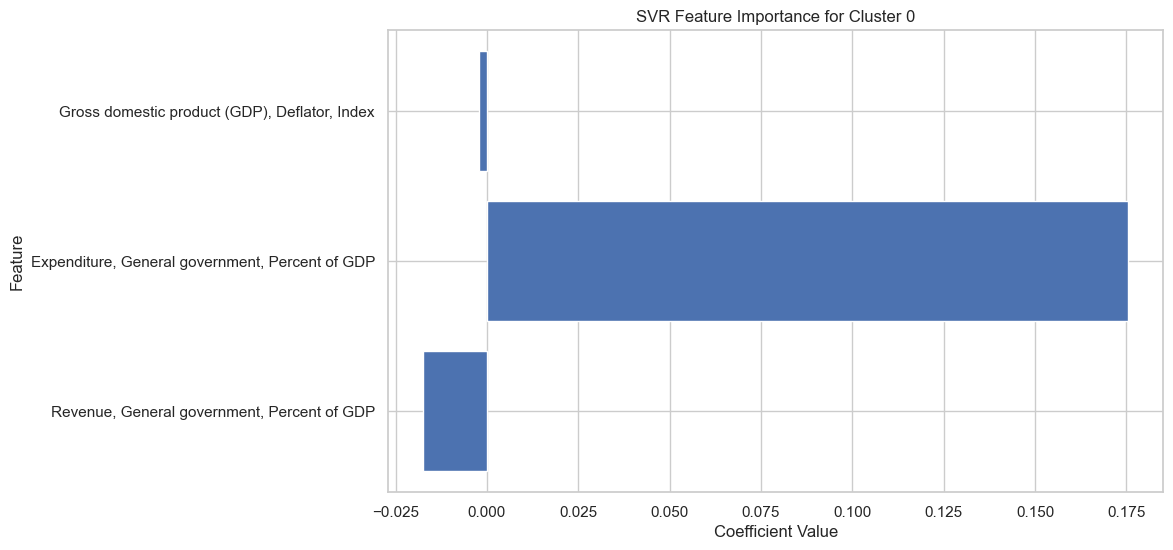


Analyzing Cluster 1 for Government Spending Effectiveness on Unemployment rate...
SVR Coefficients for Cluster 1: [[ 0.16021018 -0.01954618  0.00070141]]


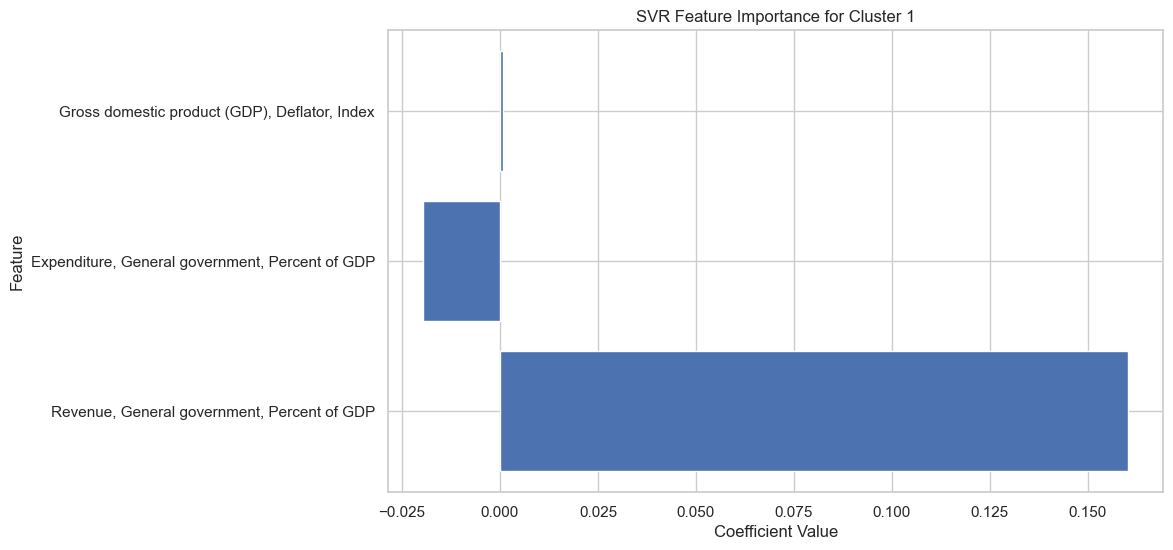


Analyzing Cluster 2 for Government Spending Effectiveness on Unemployment rate...
SVR Coefficients for Cluster 2: [[-0.04999387  0.08569247  0.00606844]]


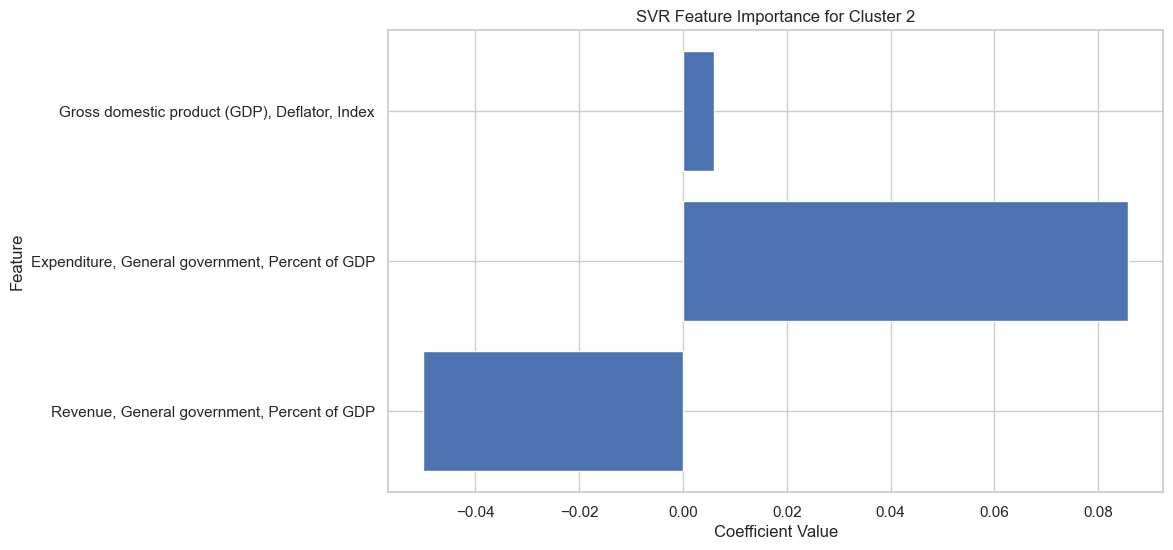

In [272]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR

# Define features for clustering (only include variables with significant Granger causality)
economic_features = [
    'Revenue, General government, Percent of GDP',  # Significant Granger causality with Unemployment rate
    'Expenditure, General government, Percent of GDP',  # Significant Granger causality with Unemployment rate
    'Gross domestic product (GDP), Deflator, Index',  # Significant Granger causality with Unemployment rate
]

# Perform Support Vector Regression for government spending's effect on Unemployment rate for each cluster
regression_results_svr = {}

# Prepare plots for feature importance
for cluster in range(optimal_clusters):
    print(f"\nAnalyzing Cluster {cluster} for Government Spending Effectiveness on Unemployment rate...")
    
    # Filter data for the current cluster
    cluster_data = clustering_data[clustering_data['Cluster'] == cluster]
    
    # Prepare data for regression analysis
    causal_data = cluster_data.copy()
    causal_data.drop(columns=['Cluster', 'PCA1', 'PCA2'], inplace=True)  # Drop unnecessary columns
    
    # Define independent variables (controls) and dependent variable (outcome)
    X = causal_data[economic_features]  # Government spending and other relevant features
    y = causal_data['Unemployment rate']  # Unemployment rate
    
    # Perform Support Vector Regression
    svr_model = SVR(kernel='linear')
    svr_model.fit(X, y)
    
    # Store the SVR coefficients (effect of government spending on Unemployment rate)
    regression_results_svr[cluster] = svr_model.coef_
    print(f"SVR Coefficients for Cluster {cluster}: {svr_model.coef_}")
    
    # Plot feature importance using SVR coefficients
    plt.figure(figsize=(10, 6))
    plt.barh(economic_features, svr_model.coef_[0])  # Horizontal bar chart for coefficients
    plt.title(f'SVR Feature Importance for Cluster {cluster}')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()


C:\Users\88018\AppData\Local\Temp\ipykernel_19352\3732474786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


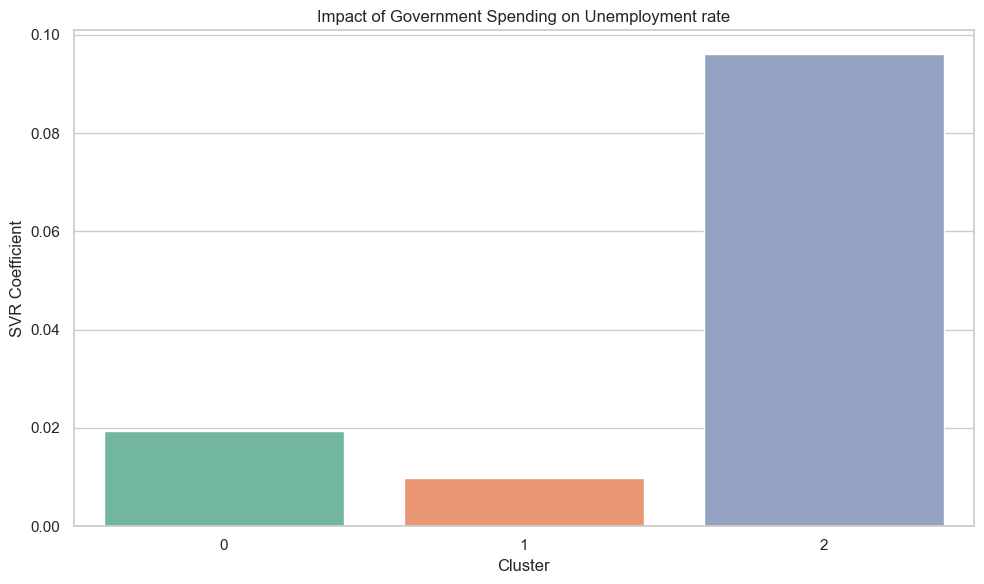

In [206]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=list(regression_results_svr.keys()),
    y=[coef.item() for coef in regression_results_svr.values()],  # Extract scalar values
    palette='Set2'
)
plt.title('Impact of Government Spending on Unemployment rate')
plt.xlabel('Cluster')
plt.ylabel('SVR Coefficient')
plt.xticks(range(optimal_clusters))
plt.tight_layout()
plt.show()

# Effectiveness of Government Spending on Growth using causal effect estimation

In [249]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Load dataset
data = pd.read_csv(r"project\unemployment_rate_dataset.csv")



## Features for clustering

In [250]:
# Define features for clustering
economic_features = [
    'Unemployment rate',
    'Gross domestic product (GDP), Current prices, Per capita, US Dollar',
    'Current account balance, Percent of GDP',
    'Gross national savings, Percent of GDP',
    'Gross capital formation, Percent of GDP',
    'Revenue, General government, Percent of GDP',
    'Expenditure, General government, Percent of GDP',
    'Net lending (+) / net borrowing (-), General government, Percent of GDP',
    'Gross debt, General government, Percent of GDP',
    'Gross domestic product (GDP), Deflator, Index',
]



## Data Preparation

In [251]:
# Prepare data: Select relevant features and handle missing values
clustering_data = data[economic_features].copy()
clustering_data = clustering_data.apply(pd.to_numeric, errors='coerce')  # Ensure numeric
clustering_data = clustering_data.dropna()  # Drop rows with missing values

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)


## Perform KMeans++ Clustering

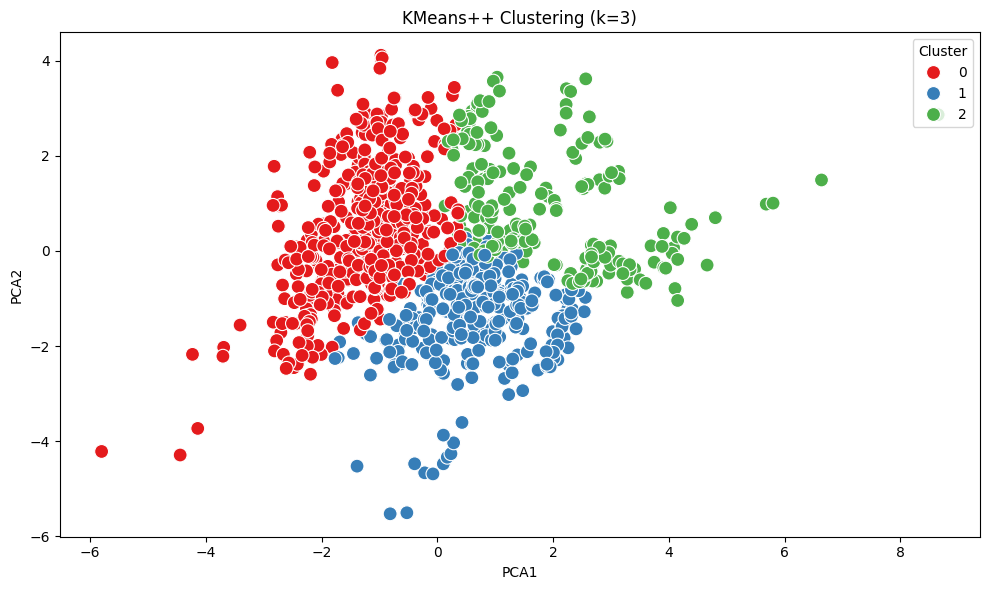

In [252]:
# Perform clustering with the chosen number of clusters (set by Elbow Method earlier)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(scaled_data)

# PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
clustering_data['PCA1'] = pca_data[:, 0]
clustering_data['PCA2'] = pca_data[:, 1]

# Visualization of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=clustering_data, palette='Set1', s=100
)
plt.title(f'KMeans++ Clustering (k={optimal_clusters})')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
plt.show()

# # Analyze Cluster Characteristics
cluster_summary = clustering_data.groupby('Cluster')[economic_features].mean()
# # print("\nCluster Characteristics:")
# # print(cluster_summary)

## Heatmap of Cluster Characteristics

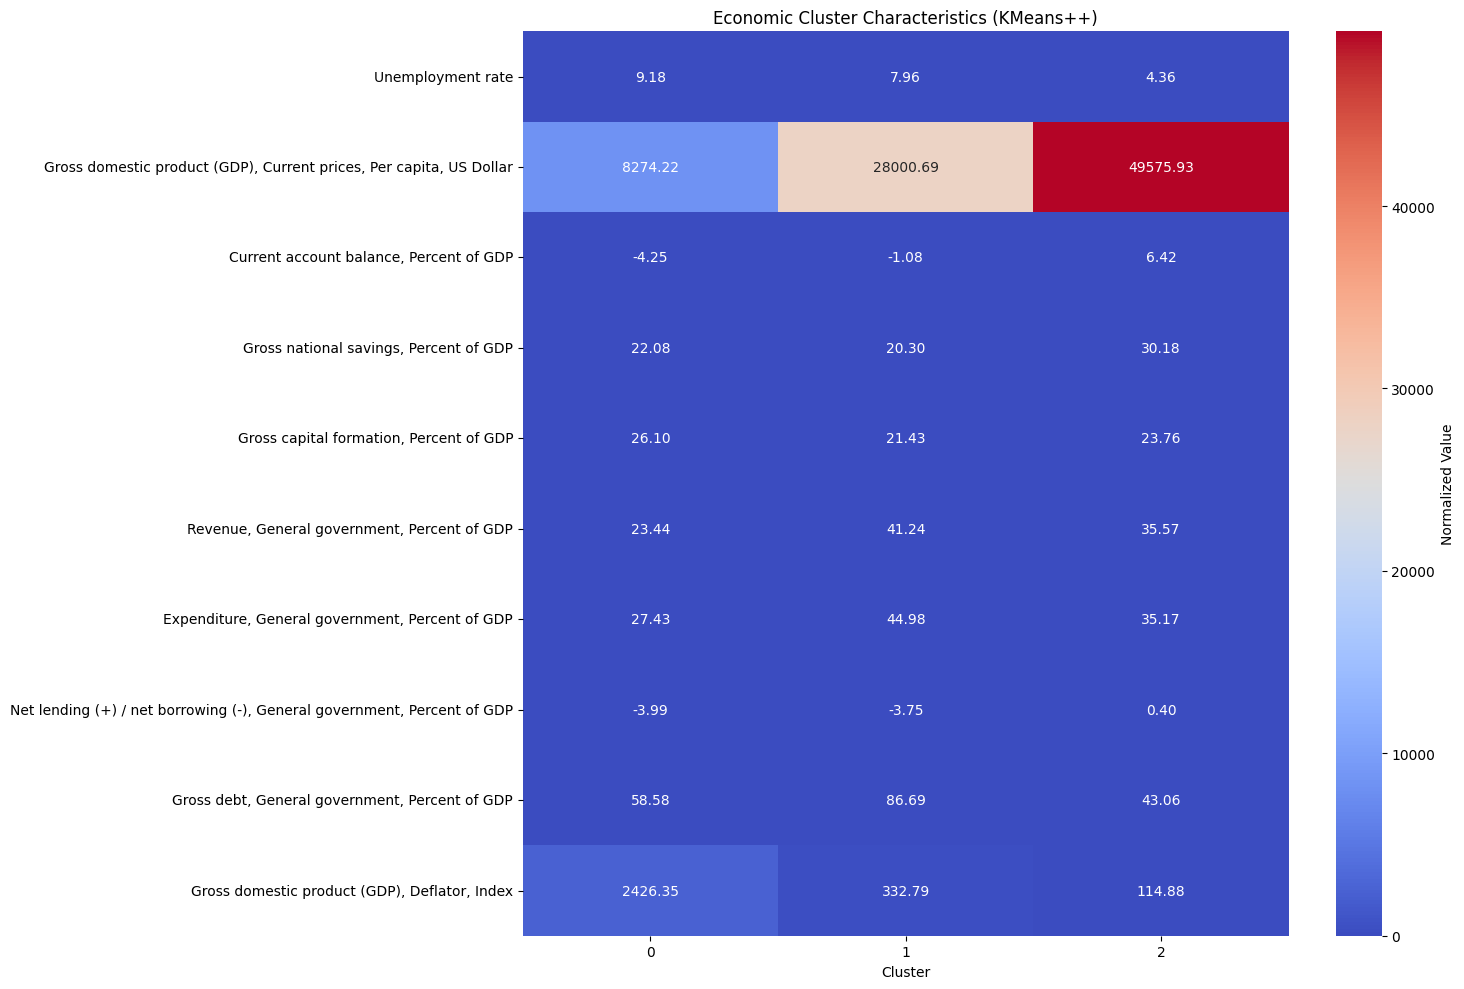

In [253]:
# Heatmap of Cluster Characteristics
plt.figure(figsize=(15, 10))
sns.heatmap(cluster_summary.T, cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'Normalized Value'})
plt.title('Economic Cluster Characteristics (KMeans++)')
plt.tight_layout()
plt.show()

## Cluster Distribution

In [254]:
# Cluster Distribution
cluster_distribution = clustering_data['Cluster'].value_counts()
print("\nCluster Distribution:")
print(cluster_distribution)


Cluster Distribution:
Cluster
0    483
1    295
2    205
Name: count, dtype: int64


## Perform Support Vector Regression for government spending's effect on GDP growth for each cluster

In [255]:
regression_results_svr = {}

for cluster in range(optimal_clusters):
    print(f"\nAnalyzing Cluster {cluster} for Government Spending Effectiveness on Growth (SVR)...")
    
    # Filter data for the current cluster
    cluster_data = clustering_data[clustering_data['Cluster'] == cluster]
    
    # Prepare data for regression analysis
    causal_data = cluster_data.copy()
    causal_data.drop(columns=['Cluster', 'PCA1', 'PCA2'], inplace=True)  # Drop unnecessary columns
    
    # Define independent variables (controls) and dependent variable (outcome)
    X = causal_data[['Expenditure, General government, Percent of GDP']]  # Government spending
    y = causal_data['Gross domestic product (GDP), Current prices, Per capita, US Dollar']  # GDP growth
    
    # Perform Support Vector Regression
    svr_model = SVR(kernel='linear')
    svr_model.fit(X, y)
    
    # Store the SVR coefficient (effect of government spending on GDP)
    regression_results_svr[cluster] = svr_model.coef_[0]
    print(f"SVR Coefficient for Cluster {cluster}: {svr_model.coef_[0]}")


Analyzing Cluster 0 for Government Spending Effectiveness on Growth (SVR)...
SVR Coefficient for Cluster 0: [49.268]

Analyzing Cluster 1 for Government Spending Effectiveness on Growth (SVR)...
SVR Coefficient for Cluster 1: [317.48352333]

Analyzing Cluster 2 for Government Spending Effectiveness on Growth (SVR)...
SVR Coefficient for Cluster 2: [400.402]


## Visualize SVR results

C:\Users\88018\AppData\Local\Temp\ipykernel_4456\2834100635.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


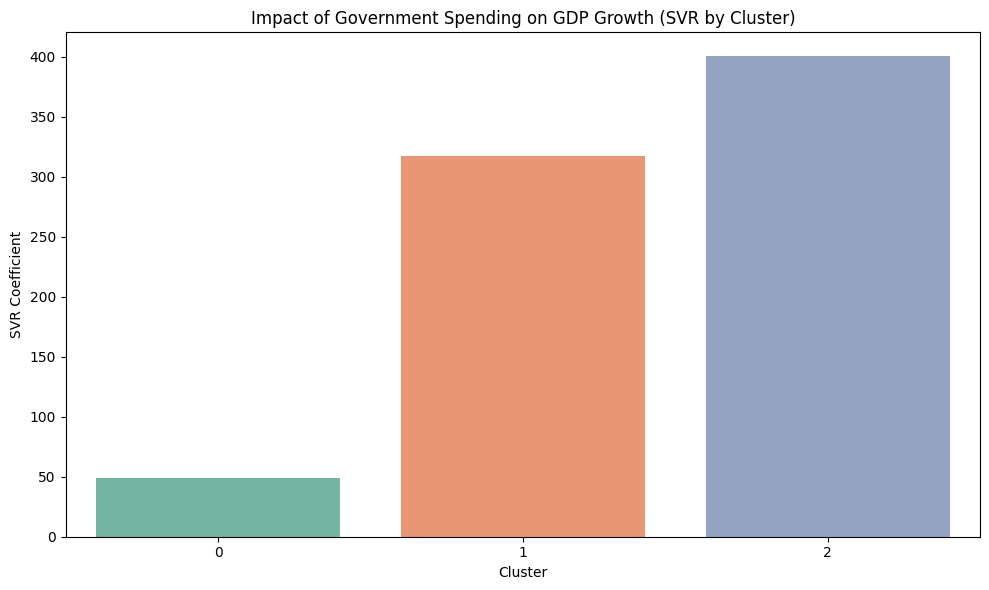

In [256]:
# Visualize SVR results
plt.figure(figsize=(10, 6))
sns.barplot(
    x=list(regression_results_svr.keys()),
    y=[coef.item() for coef in regression_results_svr.values()],  # Extract scalar values
    palette='Set2'
)
plt.title('Impact of Government Spending on GDP Growth (SVR by Cluster)')
plt.xlabel('Cluster')
plt.ylabel('SVR Coefficient')
plt.xticks(range(optimal_clusters))
plt.tight_layout()
plt.show()